# **INTRODUCTION**

- **NAMA**   : Wawan Setiawan
- **BATCH**  : HCK-006

# **QUERY SQL**

```
SELECT limit_balance,
      CAST(sex AS INT64) AS sex,
      CAST(education_level AS INT64) AS education_level,
      CAST(marital_status AS INT64) AS marital_status,
      age,
      pay_0, pay_2, pay_3, pay_4,
      CAST(pay_5 AS FLOAT64) AS pay_05,
      CAST(pay_6 AS FLOAT64) AS pay_06,
      bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6,
      pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6,
      CAST(default_payment_next_month AS INT64) AS default_payment_next_month
FROM `bigquery-public-data.ml_datasets.credit_card_default`
ORDER BY RAND()
LIMIT 11970
```





# **PROBLEM**

Create model Classification to predict default_payment_next_month using dataset credit_card_default on BigQuery.

# **CONCEPTUAL PROBLEM**

1. What is meant by criterion in a Decision Tree? Explain the criterion used in this case!

2. Explain what is meant by pruning in Tree-based models (reason, definition, types, etc.)!

3. How to choose the optimal K in KNN?

4. Explain what is meant by Cross Validation!

5. What is meant by the following metrics: Accuracy, Precision, Recall, F1 Score, and when is the appropriate time to use them?

Answer :
1. In a Decision Tree, the criterion refers to the metric used to evaluate the quality of a split at each node. It determines how the tree measures the impurity or information gain of the data at a specific decision point. The used criteria are:

  - Gini impurity: It measures the probability of incorrectly classifying a randomly chosen element in a dataset. A lower Gini impurity indicates a better split.
  - Information gain (or entropy): It measures the reduction in entropy or the amount of disorder in the dataset after the split. Higher information gain suggests a better split.

2. Pruning in tree-based models is a technique used to reduce overfitting and improve the model's generalization capabilities. It involves removing or collapsing specific branches (subtrees) of a decision tree or limiting its depth. Pruning can be performed in two main ways:

  - Pre-pruning: This involves setting constraints on tree growth during the construction phase, such as specifying a maximum depth, minimum number of samples in a leaf, or maximum number of leaf nodes. It stops the tree from growing too complex and helps prevent overfitting.
  - Post-pruning: Also known as cost-complexity pruning or just pruning, it involves growing the tree to its maximum size and then removing or collapsing branches that do not significantly improve performance based on a cost-complexity measure. Pruning is guided by metrics like the alpha parameter (which balances complexity and accuracy) or cross-validation.

3. Choosing the optimal K in KNN (K-nearest neighbors) is a crucial step. Some common approaches include:

  - Rule of thumb: Taking the square root of the number of instances in the training data is a commonly used rule of thumb to determine the value of K. However, this rule may not always provide the best performance.
  - Cross-validation: Using cross-validation techniques like k-fold cross-validation, leave-one-out cross-validation, or stratified cross-validation can help estimate the performance of the KNN algorithm for different values of K and choose the one with the best performance.
  - Grid search: Performing an exhaustive search over a range of possible K values and evaluating the performance on a validation set can help identify the optimal K value.

4. Cross-validation is a technique used to assess the performance and generalization ability of a machine learning model. It involves splitting the dataset into multiple subsets, usually called "folds." The model is trained on a combination of these folds and evaluated on the remaining fold. The process is repeated multiple times, with different folds used for training and evaluation each time. This helps in obtaining a more reliable estimate of the model's performance by reducing the dependency on a single train-test split.

5. The following metrics are used to evaluate the performance of classification models:
  - Accuracy: It measures the proportion of correctly classified instances to the total number of instances. It is suitable when the classes are balanced and misclassifications have equal importance.
  - Precision: It represents the proportion of correctly predicted positive instances (true positives) out of all instances predicted as positive (true positives + false positives). Precision is useful when minimizing false positives is crucial, such as in spam email detection.
  - Recall (Sensitivity or True Positive Rate): It measures the proportion of correctly predicted positive instances (true positives) out of all actual positive instances (true positives + false negatives). Recall is important when minimizing false negatives is critical, such as in medical diagnoses.
  - F1 Score: It is the harmonic mean of precision and recall, providing a balanced measure of a model's performance. It considers both false positives and false negatives. F1 Score is appropriate when there is an imbalance between classes and misclassifications have different consequences.

# **INSTALL ENGINE**

In [2]:
! pip install feature_engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.6/326.6 kB 13.2 MB/s eta 0:00:00


# **IMPORT LIBRARIES**

In [79]:
## import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


# **DATA LOADING**

In [5]:
df = pd.read_csv('/content/h8dsft_P1M1_Wawan_Setiawan.csv')

In [6]:
df.head(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_05,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000,2,2,2,45,-1,-1,-1,-1,0,...,780,390,390,390,3889,780,0,390,390,0
1,140000,1,2,2,30,-1,-1,-1,0,0,...,137748,81195,47338,0,143200,5200,2352,2000,2000,0
2,70000,2,2,1,38,0,0,0,0,0,...,6197,4560,0,3000,7000,1100,1000,0,0,0
3,120000,2,2,2,23,0,0,0,0,0,...,83592,22321,32150,6019,5000,5000,2000,20000,10000,0
4,320000,1,1,1,60,-1,-1,-1,-1,0,...,886,11741,4317,3465,84440,886,11533,4317,52466,1
5,100000,1,2,2,27,0,0,0,0,0,...,3895,4037,12959,2500,1162,3000,159,11845,200,0
6,200000,1,2,1,40,1,2,2,0,-1,...,234177,201490,190721,5133,0,5857,202076,6726,5346,0
7,30000,1,3,2,46,3,2,0,0,0,...,14350,14650,15156,0,1234,600,532,750,825,1
8,30000,2,2,1,26,-2,-2,-2,-2,-2,...,2444,2309,0,11208,1211,2444,2615,0,0,0
9,230000,1,1,1,35,-2,-2,-2,-2,-2,...,6245,394,987,4114,2566,6286,394,989,3129,0


In [7]:
df.tail(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_05,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2955,50000,1,2,1,41,0,0,0,0,0,...,48635,19373,20129,2500,2500,3000,1500,2000,3000,0
2956,20000,1,2,2,22,0,0,-2,-2,-1,...,734,1698,500,406,1101,736,1799,601,0,0
2957,40000,1,2,2,26,1,2,2,2,2,...,12156,20897,20411,0,2000,0,9000,0,1850,1
2958,80000,2,2,1,32,1,2,0,0,0,...,74266,75892,75816,0,3000,2800,2800,2700,2800,0
2959,150000,2,2,1,36,0,0,0,0,0,...,44309,27428,2013,2354,2500,1200,2618,2013,4724,0
2960,50000,1,2,1,32,0,0,0,0,0,...,23584,17272,17634,1472,1500,1282,618,640,644,0
2961,360000,2,2,1,30,0,0,-1,-1,-1,...,2255,4164,0,1067,1341,2255,4164,0,211,0
2962,80000,2,2,1,30,2,2,-2,-2,-1,...,0,1005,5,0,0,0,1005,0,0,0
2963,400000,2,1,1,55,-1,-1,-1,-1,0,...,199209,179290,9780,193358,72356,199209,411,0,126743,0
2964,450000,2,3,2,40,-1,-1,-1,-1,0,...,14602,18065,19239,26731,55367,15174,10528,10037,48551,0


# **EXPLORATORY DATA ANALYSIS (EDA)**

## DATA SCHEMA

* limit_balance : Amount of given credit in NT dollars (includes individual and family/supplementary credit)
* sex : Gender (1=male, 2=female)
* education_level : Education Level (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* marital_status : Marital status (1=married, 2=single, 3=others)
* age : Age in years   
* pay_0 : Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)  
* pay_2 : Repayment status in August, 2005 (scale same as above)
* pay_3 : Repayment status in July, 2005 (scale same as above)
* pay_4 : Repayment status in June, 2005 (scale same as above)
* pay_5 : Repayment status in May, 2005 (scale same as above)
* pay_6 : Repayment status in April, 2005 (scale same as above)
* bill_amt_1 : Amount of bill statement in September, 2005 (NT dollar)
* bill_amt_2 : Amount of bill statement in August, 2005 (NT dollar)
* bill_amt_3 : Amount of bill statement in July, 2005 (NT dollar)
* bill_amt_4 : Amount of bill statement in June, 2005 (NT dollar)
* bill_amt_5 : Amount of bill statement in May, 2005 (NT dollar)
* bill_amt_6 : Amount of bill statement in April, 2005 (NT dollar)
* pay_amt_1 : Amount of previous payment in September, 2005 (NT dollar)
* pay_amt_2 : Amount of previous payment in August, 2005 (NT dollar)
* pay_amt_3 : Amount of previous payment in July, 2005 (NT dollar)
* pay_amt_4 : Amount of previous payment in June, 2005 (NT dollar)
* pay_amt_5 : Amount of previous payment in May, 2005 (NT dollar)Amount of previous payment in April, 2005 (NT dollar)
* default_payment_next_month : Default payment (1=yes, 0=no)

In [8]:
# check basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   limit_balance               2965 non-null   int64
 1   sex                         2965 non-null   int64
 2   education_level             2965 non-null   int64
 3   marital_status              2965 non-null   int64
 4   age                         2965 non-null   int64
 5   pay_0                       2965 non-null   int64
 6   pay_2                       2965 non-null   int64
 7   pay_3                       2965 non-null   int64
 8   pay_4                       2965 non-null   int64
 9   pay_05                      2965 non-null   int64
 10  pay_06                      2965 non-null   int64
 11  bill_amt_1                  2965 non-null   int64
 12  bill_amt_2                  2965 non-null   int64
 13  bill_amt_3                  2965 non-null   int64
 14  bill_amt


All values are intergers.

In [9]:
## check data duplicate
df[df.duplicated()].shape

(1, 24)

There is in one duplicat column will be handle on the next sectiom

In [10]:
## check missing values
df.isnull().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_05                        0
pay_06                        0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

There is no missing value

In [11]:
# numeric overview
df.describe().T

,count,mean,std,min,25%,50%,75%,max
limit_balance,2965.0,163369.308600,125030.415472,10000.0,50000.0,140000.0,230000.0,800000.0
sex,2965.0,1.607757,0.488333,1.0,1.0,2.0,2.0,2.0
education_level,2965.0,1.849578,0.778184,0.0,1.0,2.0,2.0,6.0
marital_status,2965.0,1.559865,0.522317,0.0,1.0,2.0,2.0,3.0
age,2965.0,35.193255,9.109439,21.0,28.0,34.0,41.0,69.0
pay_0,2965.0,0.005059,1.114395,-2.0,-1.0,0.0,0.0,8.0
pay_2,2965.0,-0.122428,1.180784,-2.0,-1.0,0.0,0.0,7.0
pay_3,2965.0,-0.141653,1.183630,-2.0,-1.0,0.0,0.0,7.0
pay_4,2965.0,-0.185160,1.178322,-2.0,-1.0,0.0,0.0,8.0
pay_05,2965.0,-0.225295,1.159003,-2.0,-1.0,0.0,0.0,7.0


## EDA FOR ANALYSIS

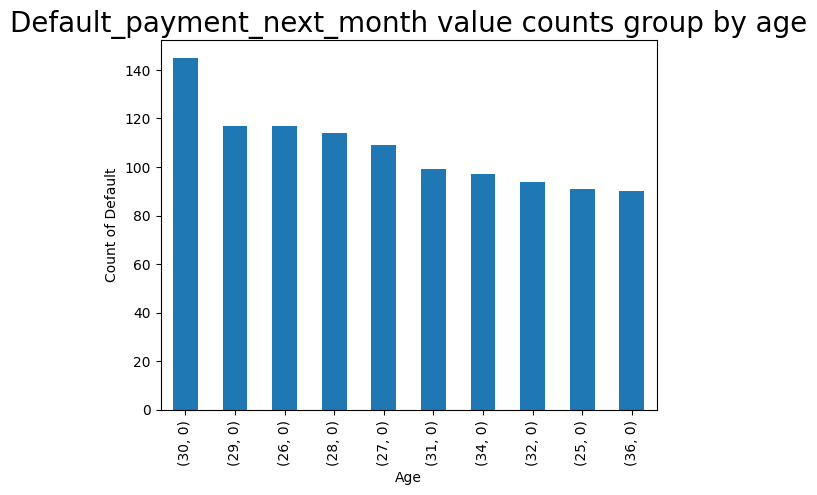

In [12]:
# Analysis default_payment_next_month value counts group by age
df['default_payment_next_month'].groupby(df['age']).value_counts().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel("Age")
plt.ylabel("Count of Default")
plt.title('Default_payment_next_month value counts group by age', fontsize=20)
plt.show()

age : Age in years

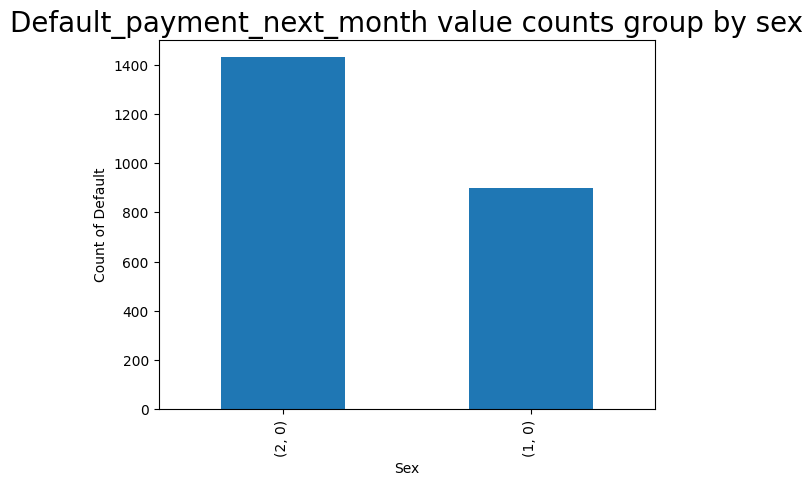

In [13]:
# Analysis default_payment_next_month value counts group by sex
df['default_payment_next_month'].groupby(df['sex']).value_counts().sort_values(ascending=False).head(2).plot(kind='bar')
plt.xlabel("Sex")
plt.ylabel("Count of Default")
plt.title('Default_payment_next_month value counts group by sex', fontsize=20)
plt.show()

sex : Gender (1=male, 2=female)


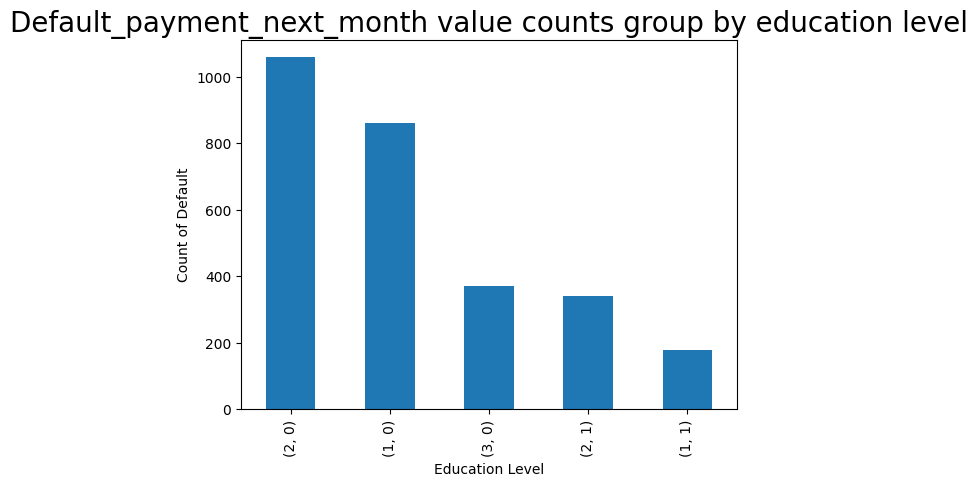

In [14]:
# Analysis default_payment_next_month value counts group by education level
df['default_payment_next_month'].groupby(df['education_level']).value_counts().sort_values(ascending=False).head(5).plot(kind='bar')
plt.xlabel("Education Level")
plt.ylabel("Count of Default")
plt.title('Default_payment_next_month value counts group by education level', fontsize=20)
plt.show()

education_level : Education Level (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

EDA Analysis :
- Credit default mostly happen in age 25 until 36
- Default credit is more significantly happen in gender Female
- Education level University mostly appear as credit_default user, 2nd is Graduated School

# **DATA CLEANING**

In [15]:
# dataframe used in this section saved on df_clean variable
df_clean = df.copy()
df_clean.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_05,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000,2,2,2,45,-1,-1,-1,-1,0,...,780,390,390,390,3889,780,0,390,390,0
1,140000,1,2,2,30,-1,-1,-1,0,0,...,137748,81195,47338,0,143200,5200,2352,2000,2000,0
2,70000,2,2,1,38,0,0,0,0,0,...,6197,4560,0,3000,7000,1100,1000,0,0,0
3,120000,2,2,2,23,0,0,0,0,0,...,83592,22321,32150,6019,5000,5000,2000,20000,10000,0
4,320000,1,1,1,60,-1,-1,-1,-1,0,...,886,11741,4317,3465,84440,886,11533,4317,52466,1


## REMOVE DUPLICATE

In [16]:
# shape of dataframe before remove duplicates
df_clean[df_clean.duplicated()].shape

(1, 24)

In [17]:
df_clean.drop_duplicates(inplace=True)

# shape of dataframe after remove duplicates
df_clean[df_clean.duplicated()].shape

(0, 24)

## RENAME CATEGORICAL DATA

In [18]:
# rename sex as category
df_clean['sex'] = df_clean['sex'].replace({1: 'male', 2 : 'female'})

In [19]:
# rename education_level as category
df_clean['education_level'] = df_clean['education_level'].replace({0 : 'unknown_0',1: 'graduate school', 2 : 'university',3 : 'high scholl', 4 : 'others', 5 : 'unknown_1', 6 : 'unknown_2'})

In [20]:
# rename marital_status as category
df_clean['marital_status'] = df_clean['marital_status'].replace({0 : 'others',1: 'married', 2 : 'single', 3 : 'others'})

In [21]:
# astype target as float to same as feature after encoding
df_clean['default_payment_next_month'] = df_clean['default_payment_next_month'].astype(float)

In [22]:
df_clean

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_05,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000,female,university,single,45,-1,-1,-1,-1,0,...,780,390,390,390,3889,780,0,390,390,0.0
1,140000,male,university,single,30,-1,-1,-1,0,0,...,137748,81195,47338,0,143200,5200,2352,2000,2000,0.0
2,70000,female,university,married,38,0,0,0,0,0,...,6197,4560,0,3000,7000,1100,1000,0,0,0.0
3,120000,female,university,single,23,0,0,0,0,0,...,83592,22321,32150,6019,5000,5000,2000,20000,10000,0.0
4,320000,male,graduate school,married,60,-1,-1,-1,-1,0,...,886,11741,4317,3465,84440,886,11533,4317,52466,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,50000,male,university,married,32,0,0,0,0,0,...,23584,17272,17634,1472,1500,1282,618,640,644,0.0
2961,360000,female,university,married,30,0,0,-1,-1,-1,...,2255,4164,0,1067,1341,2255,4164,0,211,0.0
2962,80000,female,university,married,30,2,2,-2,-2,-1,...,0,1005,5,0,0,0,1005,0,0,0.0
2963,400000,female,graduate school,married,55,-1,-1,-1,-1,0,...,199209,179290,9780,193358,72356,199209,411,0,126743,0.0


# **FEATURE ENGINEERING**

## SPLIT DATA

In [23]:
# define feature and target but only X due to handling missing value and outliers first
X = df_clean.drop(['default_payment_next_month'],axis=1)
y = df_clean.default_payment_next_month

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [24]:
# shape information
for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(2074, 23)
(890, 23)
(2074,)
(890,)


In [25]:
num_col = ['limit_balance','age','pay_0','pay_2','pay_3','pay_4','pay_05','pay_06','bill_amt_1','bill_amt_2','bill_amt_3','bill_amt_4','bill_amt_4','bill_amt_5','bill_amt_6','pay_amt_1','pay_amt_2','pay_amt_3','pay_amt_4','pay_amt_5']
cat_col = ['sex','education_level','marital_status']

## EDA FOR MODELLING

In [26]:
X_train_eda = X_train.copy()

In [27]:
X_train_eda.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_05,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
2652,70000,female,graduate school,single,24,0,0,0,0,0,...,62958,64209,59482,60883,3000,2190,2201,2181,2413,1952
969,50000,female,university,single,26,2,0,0,0,0,...,22289,22752,9325,9270,1744,1537,1000,187,185,0
804,120000,male,university,single,41,1,2,0,0,-1,...,27941,11990,390,390,0,1600,1000,390,390,0
639,90000,female,university,married,35,2,0,0,0,0,...,55010,52540,56236,40922,2700,2500,1900,4600,0,1600
2316,80000,male,university,married,47,2,2,2,0,0,...,71691,72507,76841,74336,6325,0,2612,5520,0,2998


## HANDLING OUTLIERS

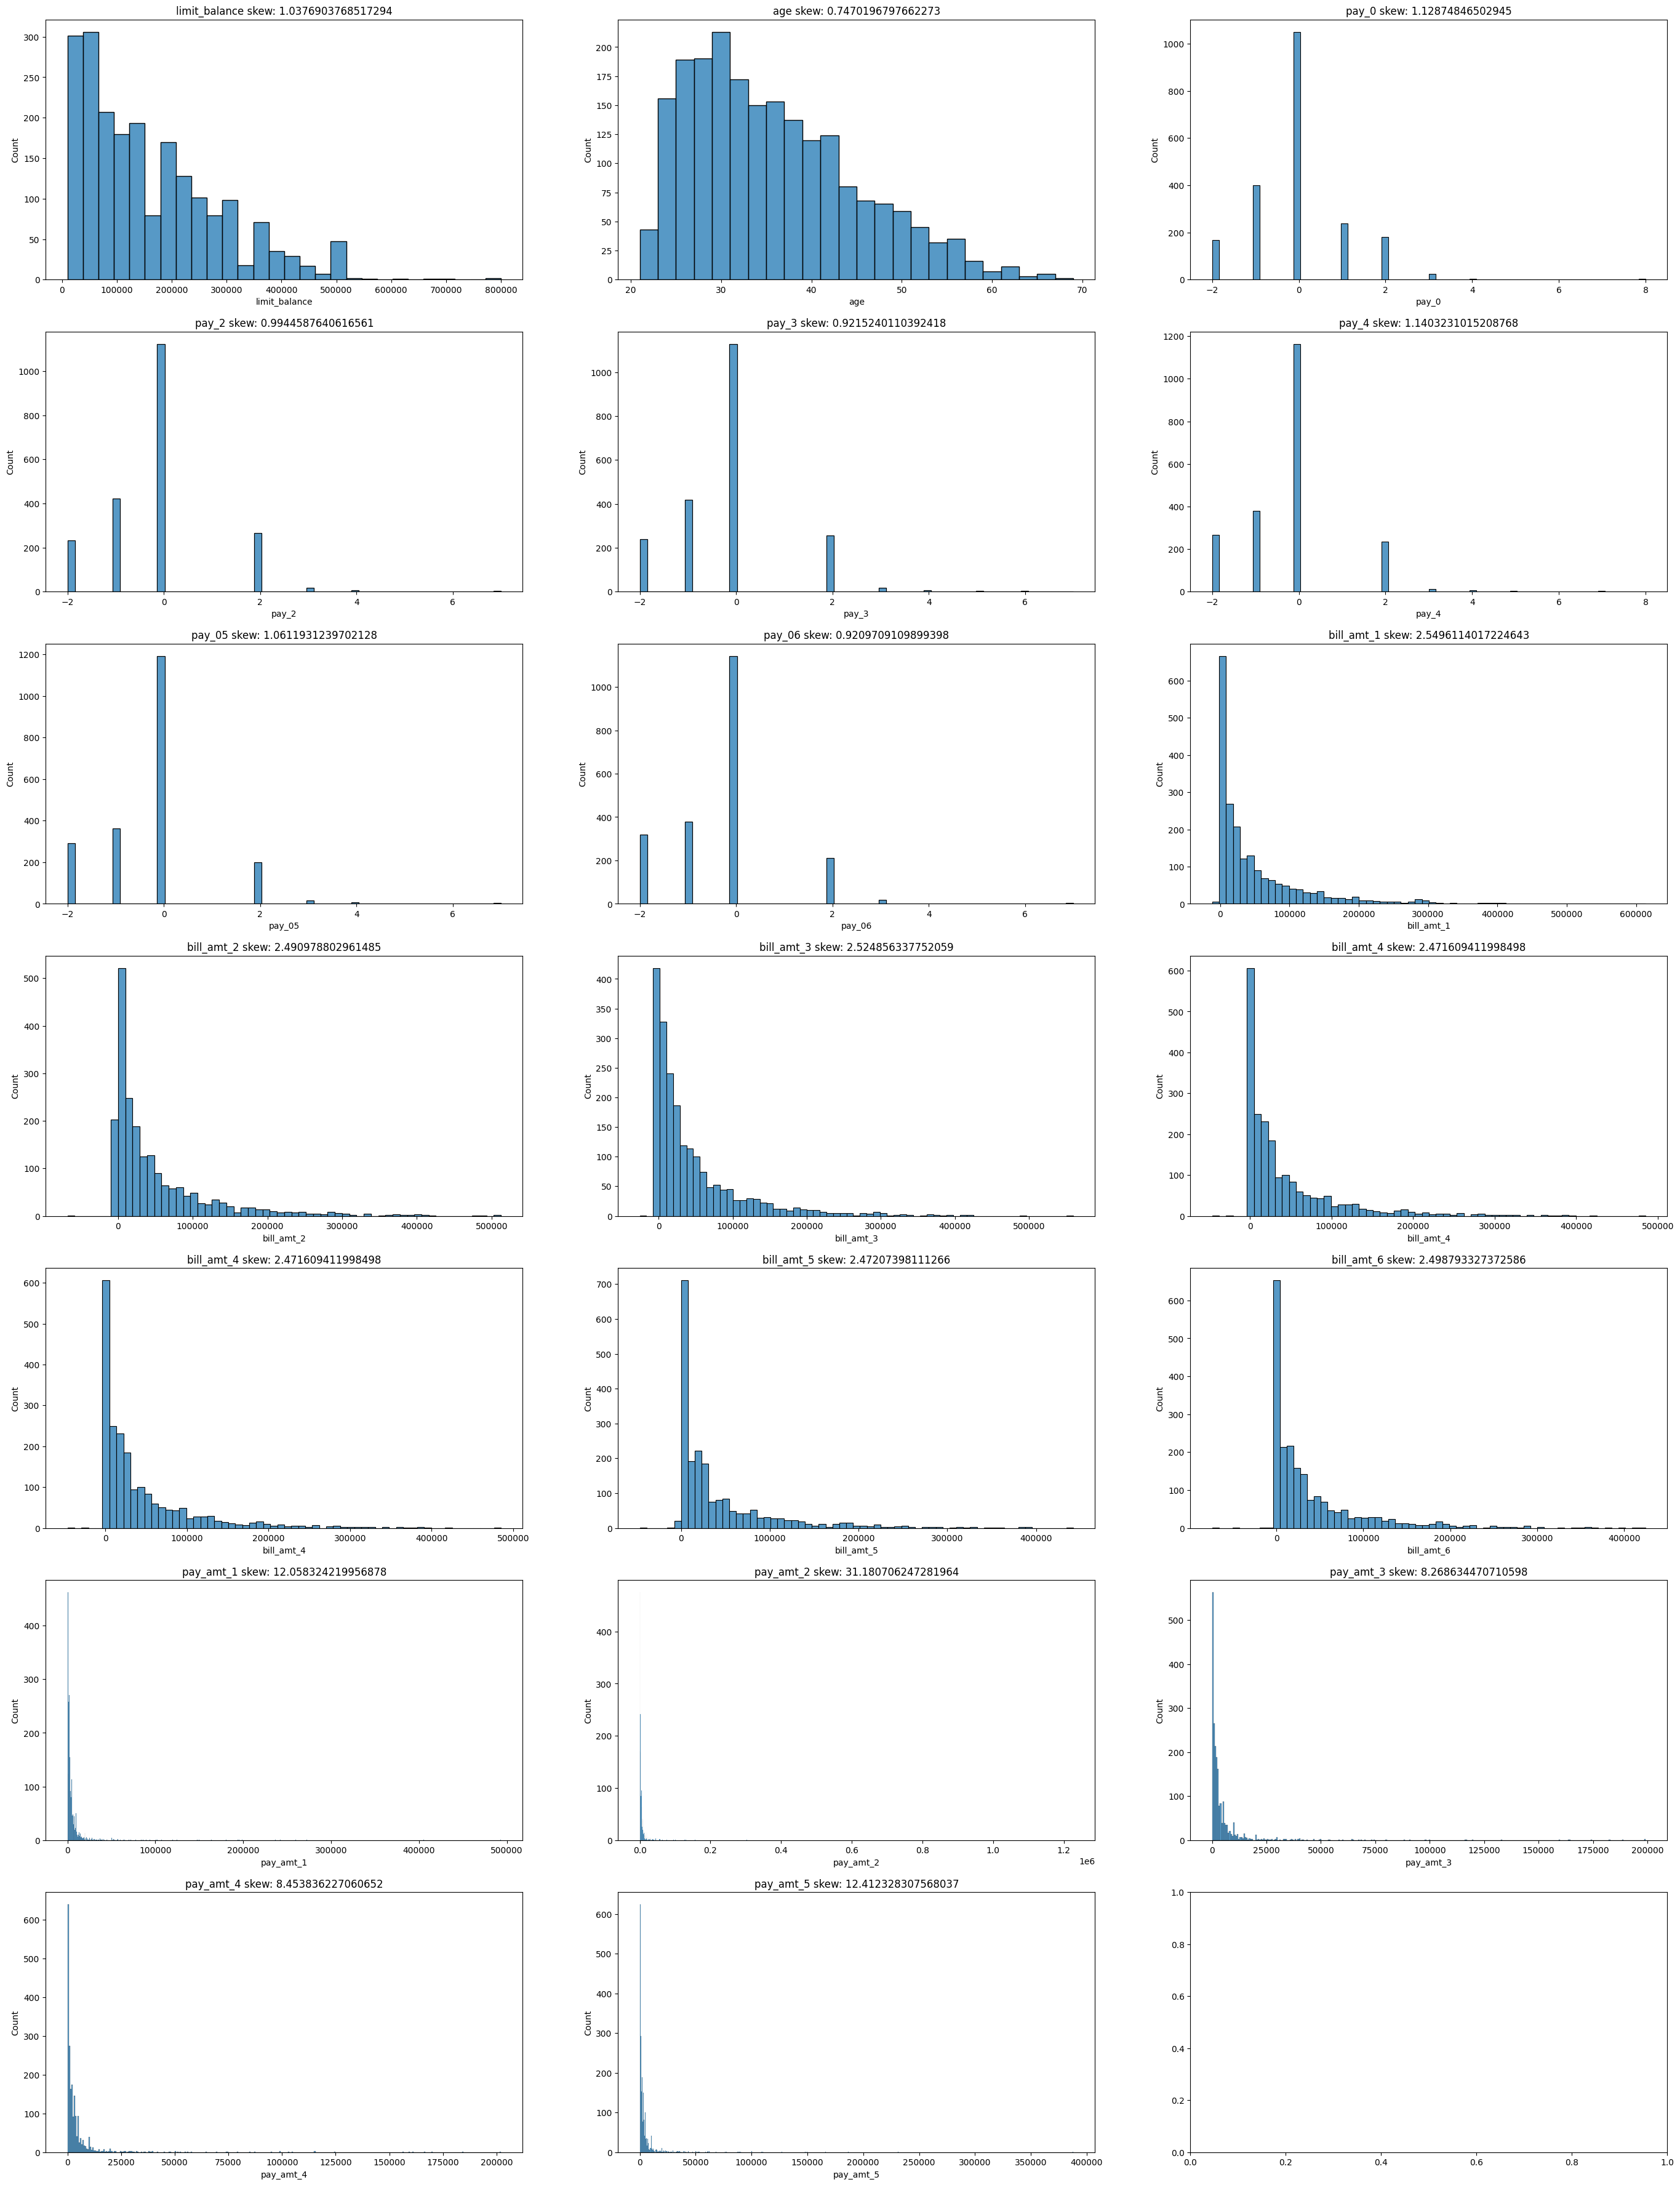

In [28]:
# ploting numerical columns to find skewness
fig, ax = plt.subplots(nrows=7,ncols=3, figsize=[34,45])
ax = ax.flatten()

for idx, col in enumerate(num_col):
    sns.histplot(X_train_eda[col], ax=ax[idx])
    ax[idx].set_title(f'{num_col[idx]} skew: {X_train_eda[col].skew()}')

In [29]:
# define function for printing skewness
def print_skew(data,columns):
  for col in columns:
    if -0.5 <= data[col].skew() <= 0.5:
      print(f'Column {col} :{data[col].skew()} is normal distribution')
    elif data[col].skew() > 0.5:
      print(f'Column {col} :{data[col].skew()} right skewed')
    elif data[col].skew() < -0.5:
      print(f'Column {col} :{data[col].skew()} left skewed')

In [30]:
print_skew(X_train_eda,num_col)

Column limit_balance :1.0376903768517294 right skewed
Column age :0.7470196797662273 right skewed
Column pay_0 :1.12874846502945 right skewed
Column pay_2 :0.9944587640616561 right skewed
Column pay_3 :0.9215240110392418 right skewed
Column pay_4 :1.1403231015208768 right skewed
Column pay_05 :1.0611931239702128 right skewed
Column pay_06 :0.9209709109899398 right skewed
Column bill_amt_1 :2.5496114017224643 right skewed
Column bill_amt_2 :2.490978802961485 right skewed
Column bill_amt_3 :2.524856337752059 right skewed
Column bill_amt_4 :2.471609411998498 right skewed
Column bill_amt_4 :2.471609411998498 right skewed
Column bill_amt_5 :2.47207398111266 right skewed
Column bill_amt_6 :2.498793327372586 right skewed
Column pay_amt_1 :12.058324219956878 right skewed
Column pay_amt_2 :31.180706247281964 right skewed
Column pay_amt_3 :8.268634470710598 right skewed
Column pay_amt_4 :8.453836227060652 right skewed
Column pay_amt_5 :12.412328307568037 right skewed


In [31]:
# define function for iqr and gaussian
iqr_feature_1 = []
iqr_feature_2 = []
gaussian_feature = []
def iqr_or_gaussian(data,columns):
  for col in columns:
    if -0.5 <= data[col].skew() <= 0.5:
      gaussian_feature.append(col)
    elif data[col].skew() > 0.5 and data[col].skew() <= 3 :
      iqr_feature_1.append(col)
    elif data[col].skew() > 3 :
      iqr_feature_2.append(col)
    elif data[col].skew() < -0.5 and data[col].skew() <= -3 :
      iqr_feature_1.append(col)
    elif data[col].skew() > -3 :
      iqr_feature_2.append(col)

In [32]:
iqr_or_gaussian(X_train_eda,num_col)

In [33]:
iqr_feature_1

['limit_balance',
 'age',
 'pay_0',
 'pay_2',
 'pay_3',
 'pay_4',
 'pay_05',
 'pay_06',
 'bill_amt_1',
 'bill_amt_2',
 'bill_amt_3',
 'bill_amt_4',
 'bill_amt_4',
 'bill_amt_5',
 'bill_amt_6']

In [34]:
iqr_feature_2

['pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5']

In [35]:
gaussian_feature

[]

- no data has a normal distribution, will continue to preprocess handling outliers using iqr method

In [36]:
# define function for print percentage outliers1
def percent_outliers1(data,columns):
  for col in columns:
    upper = data[col].mean() + (1.5 * data[col].std())
    lower = data[col].mean() - (1.5 * data[col].std())
    outlier = data[(X_train_eda[col] <= lower) | (X_train_eda[col] >= upper)]
    print('percentage', X_train_eda[col].name, ':', len(outlier)/data.shape[0] * 100, '%')

In [37]:
# define function for print percentage outliers2
def percent_outliers2(data,columns):
  for col in columns:
    upper = data[col].mean() + (3 * data[col].std())
    lower = data[col].mean() - (3 * data[col].std())
    outlier = data[(X_train_eda[col] <= lower) | (X_train_eda[col] >= upper)]
    print('percentage', X_train_eda[col].name, ':', len(outlier)/data.shape[0] * 100, '%')

In [38]:
percent_outliers1(X_train_eda, iqr_feature_1)

percentage limit_balance : 10.318225650916105 %
percentage age : 10.55930568948891 %
percentage pay_0 : 18.514946962391516 %
percentage pay_2 : 25.506268081002894 %
percentage pay_3 : 25.40983606557377 %
percentage pay_4 : 25.554484088717455 %
percentage pay_05 : 25.07232401157184 %
percentage pay_06 : 26.711668273866923 %
percentage bill_amt_1 : 7.81099324975892 %
percentage bill_amt_2 : 7.9556412729026045 %
percentage bill_amt_3 : 7.907425265188042 %
percentage bill_amt_4 : 7.81099324975892 %
percentage bill_amt_4 : 7.81099324975892 %
percentage bill_amt_5 : 8.052073288331727 %
percentage bill_amt_6 : 8.100289296046286 %


In [39]:
percent_outliers2(X_train_eda,iqr_feature_2)

percentage pay_amt_1 : 1.1089681774349083 %
percentage pay_amt_2 : 0.626808100289296 %
percentage pay_amt_3 : 1.4946962391513983 %
percentage pay_amt_4 : 1.4946962391513983 %
percentage pay_amt_5 : 1.3018322082931533 %


## TRIMMING OUTLIERS

In [40]:
# resolve any duplication variables
iqr_feature_1 = list(set(iqr_feature_1))

In [41]:
iqr_feature_1

['pay_2',
 'pay_3',
 'bill_amt_3',
 'pay_4',
 'bill_amt_4',
 'pay_05',
 'pay_06',
 'pay_0',
 'bill_amt_5',
 'limit_balance',
 'bill_amt_2',
 'bill_amt_1',
 'bill_amt_6',
 'age']

In [42]:
# resolve any duplication variables
iqr_feature_2 = list(set(iqr_feature_2))

In [43]:
iqr_feature_2

['pay_amt_4', 'pay_amt_1', 'pay_amt_3', 'pay_amt_2', 'pay_amt_5']

In [44]:
# Trimming outliers using IQR method with threshold = 1.5
wins_1 = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables= iqr_feature_1, missing_values='ignore')

X_train_eda = wins_1.fit_transform(X_train_eda)
X_train_eda.describe()

,limit_balance,age,pay_0,pay_2,pay_3,pay_4,pay_05,pay_06,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
count,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2.074000e+03,2074.000000,2074.000000,2074.000000,2074.000000
mean,160641.272903,35.168756,-0.082208,-0.213115,-0.222517,-0.252652,-0.289537,-0.318226,45135.616803,43362.946721,41121.812199,38100.262114,34952.222035,34176.820094,6498.551109,6.269557e+03,5161.459016,4636.876085,4756.214079,5217.459499
std,123602.164166,9.094772,0.927220,0.963843,0.962028,0.959908,0.949111,0.975081,51813.357128,49847.841317,46881.445630,44203.620963,40622.938278,40624.199500,22538.314784,3.082191e+04,14895.479792,13860.582215,15560.596429,17317.754126
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-11545.000000,-67526.000000,-25443.000000,-46627.000000,-46627.000000,-73562.125000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4172.000000,3553.250000,3520.250000,2591.750000,2059.500000,1343.750000,1032.500000,9.517500e+02,418.500000,293.000000,300.000000,167.000000
50%,130000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23497.500000,22625.000000,21638.500000,19980.500000,19319.500000,18624.500000,2214.000000,2.196000e+03,1800.000000,1560.000000,1562.500000,1600.000000
75%,230000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68957.250000,65305.750000,60954.750000,57727.000000,51534.250000,51281.000000,5062.250000,5.000000e+03,4275.250000,4000.000000,4000.000000,4000.000000
max,500000.000000,60.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,166135.125000,157934.500000,147106.500000,140429.875000,125746.375000,126186.875000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000


In [45]:
# Trimming outliers using IQR method with threshold = 3
wins_2 = Winsorizer(capping_method='iqr', tail='both', fold=3,
                  variables=iqr_feature_2, missing_values='ignore')

X_train_eda = wins_2.fit_transform(X_train_eda)
X_train_eda.describe()

,limit_balance,age,pay_0,pay_2,pay_3,pay_4,pay_05,pay_06,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
count,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000
mean,160641.272903,35.168756,-0.082208,-0.213115,-0.222517,-0.252652,-0.289537,-0.318226,45135.616803,43362.946721,41121.812199,38100.262114,34952.222035,34176.820094,4024.913693,3964.149831,3378.688766,3044.109932,3073.917068,5217.459499
std,123602.164166,9.094772,0.927220,0.963843,0.962028,0.959908,0.949111,0.975081,51813.357128,49847.841317,46881.445630,44203.620963,40622.938278,40624.199500,4611.835591,4668.086858,4276.323629,3944.139494,3979.532686,17317.754126
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-11545.000000,-67526.000000,-25443.000000,-46627.000000,-46627.000000,-73562.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4172.000000,3553.250000,3520.250000,2591.750000,2059.500000,1343.750000,1032.500000,951.750000,418.500000,293.000000,300.000000,167.000000
50%,130000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23497.500000,22625.000000,21638.500000,19980.500000,19319.500000,18624.500000,2214.000000,2196.000000,1800.000000,1560.000000,1562.500000,1600.000000
75%,230000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68957.250000,65305.750000,60954.750000,57727.000000,51534.250000,51281.000000,5062.250000,5000.000000,4275.250000,4000.000000,4000.000000,4000.000000
max,500000.000000,60.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,166135.125000,157934.500000,147106.500000,140429.875000,125746.375000,126186.875000,17151.500000,17144.750000,15845.500000,15121.000000,15100.000000,403500.000000


## HANDLING MISSING VALUE

In [46]:
X_train_eda.isnull().sum()

limit_balance      0
sex                0
education_level    0
marital_status     0
age                0
pay_0              0
pay_2              0
pay_3              0
pay_4              0
pay_05             0
pay_06             0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

There is no missing values

## FEATURE SCALING

### Scaling Numerical

In [47]:
# Scaling numerical for standarize the scale of values
scaler = MinMaxScaler()

X_train_eda[num_col] = scaler.fit_transform(X_train_eda[num_col])
X_train_eda

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_05,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
2652,0.122449,female,graduate school,single,0.075949,0.571429,0.571429,0.571429,0.571429,0.571429,...,0.512323,0.592526,0.615577,0.673070,0.174912,0.127736,0.138904,0.144236,0.159801,1952
969,0.081633,female,university,single,0.126582,1.000000,0.571429,0.571429,0.571429,0.571429,...,0.276628,0.370898,0.324598,0.414681,0.101682,0.089648,0.063109,0.012367,0.012252,0
804,0.224490,male,university,single,0.506329,0.857143,1.000000,0.571429,0.571429,0.285714,...,0.309384,0.313365,0.272763,0.370225,0.000000,0.093323,0.063109,0.025792,0.025828,0
639,0.163265,female,university,married,0.354430,1.000000,0.571429,0.571429,0.571429,0.571429,...,0.466260,0.530144,0.596745,0.573140,0.157421,0.145817,0.119908,0.304213,0.000000,1600
2316,0.142857,male,university,married,0.658228,1.000000,1.000000,1.000000,0.571429,0.571429,...,0.562934,0.636887,0.716282,0.740420,0.368772,0.000000,0.164842,0.365055,0.000000,2998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,0.244898,female,university,married,0.607595,0.571429,0.571429,0.571429,0.571429,0.571429,...,0.887287,0.930140,1.000000,1.000000,0.408128,0.274720,0.283992,0.621652,0.238411,5500
517,0.346939,male,graduate school,married,0.632911,0.571429,0.571429,0.571429,0.000000,0.000000,...,0.147453,0.249266,0.270500,0.368273,0.174912,0.000000,0.000000,0.000000,0.000000,0
1803,0.265306,female,university,married,0.354430,0.285714,0.285714,0.285714,0.285714,0.285714,...,0.172559,0.270960,0.287492,0.390025,0.253039,0.252672,0.263292,0.366642,0.287748,2178
2856,0.081633,male,university,single,0.481013,0.571429,0.571429,0.571429,0.571429,0.571429,...,0.430792,0.295744,0.321993,0.413590,1.000000,0.133219,0.019627,0.021295,0.021391,334


### Encoding Categorical

In [48]:
X_train_eda[cat_col]

,sex,education_level,marital_status
2652,female,graduate school,single
969,female,university,single
804,male,university,single
639,female,university,married
2316,male,university,married
...,...,...,...
281,female,university,married
517,male,graduate school,married
1803,female,university,married
2856,male,university,single


- ordinal encoding (binary values) : `sex`
- OneHotEncoding : `marital_status` and `education_level`


In [49]:
# encoding Taste, Odor, Fat -> ordinal
sex_cat = ['male', 'female']

ord_enc = OrdinalEncoder(categories=[sex_cat])
cat_ord = pd.DataFrame(ord_enc.fit_transform(X_train_eda[['sex']]))

cat_ord.columns = ['sex']
review = pd.concat([X_train_eda[['sex']].reset_index(drop=True), cat_ord], axis=1)

review.sample(5)

,sex,sex
210,male,0.0
665,female,1.0
664,female,1.0
97,female,1.0
427,female,1.0


In [50]:
# OHE on Turbidity - for example purpose
ohe_enc = OneHotEncoder(sparse=False)

cat_ohe = pd.DataFrame(ohe_enc.fit_transform(X_train_eda[['marital_status','education_level']]))
cat_ohe.columns = ohe_enc.get_feature_names_out(['marital_status','education_level']).tolist()

review = pd.concat([X_train_eda[['marital_status','education_level']].reset_index(drop=True), cat_ohe], axis=1)

review.sample(5)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,marital_status,education_level,marital_status_married,marital_status_others,marital_status_single,education_level_graduate school,education_level_high scholl,education_level_others,education_level_university,education_level_unknown_0,education_level_unknown_1,education_level_unknown_2
1192,married,university,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
630,married,university,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
193,married,university,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1075,married,high scholl,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
115,single,university,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [51]:
X_train_eda = pd.concat([X_train_eda[num_col].reset_index(drop=True), cat_ord, cat_ohe], axis=1)
X_train_eda.shape

(2074, 31)

In [52]:
X_train_eda.head()

,limit_balance,age,pay_0,pay_2,pay_3,pay_4,pay_05,pay_06,bill_amt_1,bill_amt_2,...,marital_status_married,marital_status_others,marital_status_single,education_level_graduate school,education_level_high scholl,education_level_others,education_level_university,education_level_unknown_0,education_level_unknown_1,education_level_unknown_2
0,0.122449,0.075949,0.571429,0.571429,0.571429,0.571429,0.571429,0.571429,0.424628,0.588901,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.081633,0.126582,1.000000,0.571429,0.571429,0.571429,0.571429,0.571429,0.332367,0.445657,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.224490,0.506329,0.857143,1.000000,0.571429,0.571429,0.285714,0.285714,0.751536,0.698965,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.163265,0.354430,1.000000,0.571429,0.571429,0.571429,0.571429,1.000000,0.421944,0.556408,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.142857,0.658228,1.000000,1.000000,1.000000,0.571429,0.571429,1.000000,0.449094,0.625165,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Chi Square Feature Scaling

In [53]:
# k = 11 tells four top features to be selected
# Score function Chi2 tells the feature to be selected using Chi Square
test = SelectKBest(score_func=chi2, k=11)
fit = test.fit(X_train_eda, y_train)
fit.scores_

array([1.08077735e+01, 1.13027779e-01, 2.88613741e+01, 2.12054241e+01,
       1.88514885e+01, 1.62421973e+01, 1.50910609e+01, 1.26656966e+01,
       8.30066120e-02, 2.36621654e-02, 1.67884286e-02, 3.11606074e-02,
       3.11606074e-02, 4.59758221e-03, 6.56784255e-03, 1.05624017e+01,
       1.33914763e+01, 1.10382948e+01, 1.03506040e+01, 7.26814578e+00,
       1.01316547e+00, 1.29616882e+00, 1.36088794e-01, 9.75849463e-01,
       8.22247614e+00, 8.03661265e-04, 1.36196319e+00, 7.06034179e+00,
       5.44785276e-01, 2.18496967e+00, 3.65235911e+00])

In [54]:
np.round_(fit.scores_)

array([11.,  0., 29., 21., 19., 16., 15., 13.,  0.,  0.,  0.,  0.,  0.,
        0.,  0., 11., 13., 11., 10.,  7.,  1.,  1.,  0.,  1.,  8.,  0.,
        1.,  7.,  1.,  2.,  4.])

In [55]:
# sorting feature based score chi-square
chi = pd.Series(fit.scores_)
chi.index = X_train_eda.columns
chi.sort_values(ascending=False).head(11)

pay_0            28.861374
pay_2            21.205424
pay_3            18.851489
pay_4            16.242197
pay_05           15.091061
pay_amt_2        13.391476
pay_06           12.665697
pay_amt_3        11.038295
limit_balance    10.807774
pay_amt_1        10.562402
pay_amt_4        10.350604
dtype: float64

In [56]:
result = chi.sort_values(ascending=False).head(11)

In [57]:
result = result.index

In [58]:
# Calling original features
X_before_columns = X_train.columns
X_before_columns

Index(['limit_balance', 'sex', 'education_level', 'marital_status', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_05', 'pay_06', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6'],
      dtype='object')

In [59]:
# Feature after feature selection
X_after_columns = result
X_after_columns

Index(['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_05', 'pay_amt_2', 'pay_06',
       'pay_amt_3', 'limit_balance', 'pay_amt_1', 'pay_amt_4'],
      dtype='object')

In [60]:
# Feature not included for modeling
for item in X_before_columns:
    if item not in X_after_columns:
      print('After feature selection using Recursive feature elimination method:', {item}, 'is not included in modeling')


After feature selection using Recursive feature elimination method: {'sex'} is not included in modeling
After feature selection using Recursive feature elimination method: {'education_level'} is not included in modeling
After feature selection using Recursive feature elimination method: {'marital_status'} is not included in modeling
After feature selection using Recursive feature elimination method: {'age'} is not included in modeling
After feature selection using Recursive feature elimination method: {'bill_amt_1'} is not included in modeling
After feature selection using Recursive feature elimination method: {'bill_amt_2'} is not included in modeling
After feature selection using Recursive feature elimination method: {'bill_amt_3'} is not included in modeling
After feature selection using Recursive feature elimination method: {'bill_amt_4'} is not included in modeling
After feature selection using Recursive feature elimination method: {'bill_amt_5'} is not included in modeling
After 

In [61]:
# define function for iqr and gaussian cleaned
iqr_columns_1_cleaned = []
iqr_columns_2_cleaned = []
gaussian_columns_cleaned = []
def iqr_or_gaussian_cleaned(columns):
  for col in columns:
    if col in iqr_feature_1:
      iqr_columns_1_cleaned.append(col)
    elif col in iqr_feature_2:
      iqr_columns_2_cleaned.append(col)
    elif col in gaussian_feature:
      gaussian_columns_cleaned.append(col)

In [62]:
# process function
iqr_or_gaussian_cleaned(X_after_columns)

In [63]:
print(iqr_columns_1_cleaned)

['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_05', 'pay_06', 'limit_balance']


In [64]:
print(iqr_columns_2_cleaned)

['pay_amt_2', 'pay_amt_3', 'pay_amt_1', 'pay_amt_4']


In [65]:
print(gaussian_columns_cleaned)

[]


after feature selection the and all the columns trimming method only using wins_1 which IQR method with threshold = 1.5 and IQR method with threshold = 3

## PREPROCESSING

In [66]:
## Building pipeline IQR thresold = 1.5
num_pipeline_1 = Pipeline([
        ('outlier_1', Winsorizer(capping_method='iqr', tail='both', fold=1.5)),
        ('imputer', SimpleImputer(strategy='median')),
        ('scalar', MinMaxScaler())
    ])

num_tr = num_pipeline_1.fit_transform(X_train[iqr_columns_1_cleaned])

In [67]:
## Building pipeline IQR thresold = 3
num_pipeline_2 = Pipeline([
        ('outlier_2', Winsorizer(capping_method='iqr', tail='both', fold=3)),
        ('imputer', SimpleImputer(strategy='median')),
        ('scalar', MinMaxScaler())
    ])

num_tr = num_pipeline_2.fit_transform(X_train[iqr_columns_2_cleaned])

In [68]:
# Bulding full-pipeline
full_pipeline = ColumnTransformer([
        ("num_1", num_pipeline_1, iqr_columns_1_cleaned),
        ("num_2", num_pipeline_2, iqr_columns_2_cleaned),
    ])

train_tr = full_pipeline.fit_transform(X_train)

In [69]:
# feature after process pipeline
train_tr

array([[0.57142857, 0.57142857, 0.57142857, ..., 0.13890379, 0.17491182,
        0.14423649],
       [1.        , 0.57142857, 0.57142857, ..., 0.0631094 , 0.10168207,
        0.01236691],
       [0.85714286, 1.        , 0.57142857, ..., 0.0631094 , 0.        ,
        0.02579194],
       ...,
       [0.28571429, 0.28571429, 0.28571429, ..., 0.26329242, 0.25303909,
        0.36664242],
       [0.57142857, 0.57142857, 0.57142857, ..., 0.01962702, 1.        ,
        0.02129489],
       [0.85714286, 1.        , 0.57142857, ..., 0.0913193 , 0.        ,
        0.06500893]])

In [70]:
# Implementing pipeline to X_test
test_tr= full_pipeline.transform(X_test)

# **MODEL DEFINITION**

**Classifier Models :**

1. **Logistic Regression:**
Logistic Regression is linear classification algorithm used for binary classification or multi-class classification tasks. It models the relationship between the input features and the probability of belonging to a particular class using the logistic function. Logistic Regression assumes a linear relationship between the features and the log-odds of the target class. It can handle both numerical and categorical features, and regularization techniques can be applied to prevent overfitting.

2. **Support Vector Classifier (SVC)**:
SVC, or Support Vector Classifier, is machine learning algorithm used for classification tasks. It is based on the concept of support vectors, which are data points that define the decision boundary between different classes. SVC aims to find the hyperplane that maximizes the margin between classes while minimizing classification errors. It can handle linearly separable as well as non-linearly separable data by using kernel functions to transform the data into higher-dimensional spaces. SVC can handle binary classification as well as multi-class classification problems.

3. **Decision Tree Classifier:**
The Decision Tree Classifier is a non-parametric supervised learning algorithm that uses a tree-like model for classification tasks. It partitions the feature space based on the input features and creates a flowchart-like structure of decision nodes and leaf nodes. Each internal node in the tree represents a feature test, and each branch represents the outcome of the test. The leaf nodes represent the class labels. Decision trees are interpretable, can handle both numerical and categorical features, and can capture complex interactions between features. However, they are prone to overfitting if not properly regularized.

4. **Random Forest Classifier:**
Random Forest Classifier is an ensemble learning method that combines multiple decision trees to make predictions. It constructs a collection of decision trees, each trained on a different random subset of the training data and using a random subset of the features. The final prediction is made by aggregating the predictions of all the individual trees. Random Forests are known for their robustness, scalability, and ability to handle high-dimensional datasets. They are less prone to overfitting compared to individual decision trees and can capture complex interactions between features. Additionally, Random Forests provide feature importance measures, allowing the identification of the most relevant features for prediction.

5. K-Nearest Neighbors (KNN):
K-Nearest Neighbors is algorithm for both classification and regression tasks. It operates by finding the k nearest data points in the training set to a given test point based on a distance metric (e.g., Euclidean distance) and assigns the majority class label (for classification) or calculates the average (for regression). KNN is a non-parametric algorithm, meaning it doesn't make assumptions about the underlying data distribution. KNN is easy to understand and implement, but its performance can be sensitive to the choice of k and the distance metric.

6. Naive Bayes:
Naive Bayes is a probabilistic classification algorithm based on Bayes' theorem. It assumes that features are conditionally independent given the class label, which is known as the "naive" assumption. Despite this oversimplified assumption, Naive Bayes can be surprisingly effective, especially when dealing with large feature spaces. Naive Bayes calculates the probability of each class label given the feature values and selects the class label with the highest probability as the prediction. It is computationally efficient, handles both categorical and continuous features, and can work well even with limited training data. However, Naive Bayes may struggle when faced with correlated features or when the "naive" assumption is violated in the data.

In [72]:
# Preparing model with default parameter
logreg = LogisticRegression(random_state=0)
dtc = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
svc = SVC(random_state=0)
knn = KNeighborsClassifier()
nb = GaussianNB()

# **MODEL TRAINING**

## Logistic Regression

In [73]:
# Logistic Regression Model Test
logreg.fit(train_tr, y_train)

lr_train = logreg.predict(train_tr)
lr_test = logreg.predict(test_tr)

print(classification_report(y_train, lr_train))
print(classification_report(y_test, lr_test))

              precision    recall  f1-score   support

         0.0       0.83      0.97      0.90      1630
         1.0       0.72      0.28      0.41       444

    accuracy                           0.82      2074
   macro avg       0.78      0.63      0.65      2074
weighted avg       0.81      0.82      0.79      2074

              precision    recall  f1-score   support

         0.0       0.83      0.97      0.89       699
         1.0       0.73      0.25      0.37       191

    accuracy                           0.82       890
   macro avg       0.78      0.61      0.63       890
weighted avg       0.81      0.82      0.78       890



In [74]:
logreg_reports = {}
logreg_score_reports = {
    'train - precision' : precision_score(y_train, lr_train),
    'train - recall' : recall_score(y_train, lr_train),
    'train - accuracy' : accuracy_score(y_train, lr_train),
    'train - f1_score' : f1_score(y_train, lr_train),
    'test - precision' : precision_score(y_test, lr_test),
    'test - recall' : recall_score(y_test, lr_test),
    'test - accuracy_score' : accuracy_score(y_test, lr_test),
    'test - f1_score' : f1_score(y_test, lr_test),
}
logreg_reports['Logreg (Default Hyperparameter)'] = logreg_score_reports
logreg_reports = pd.DataFrame(logreg_reports)
logreg_reports

,Logreg (Default Hyperparameter)
test - accuracy_score,0.819101
test - f1_score,0.373541
test - precision,0.727273
test - recall,0.251309
train - accuracy,0.823047
train - f1_score,0.405186
train - precision,0.722543
train - recall,0.281532


Confusion Matrix      : 


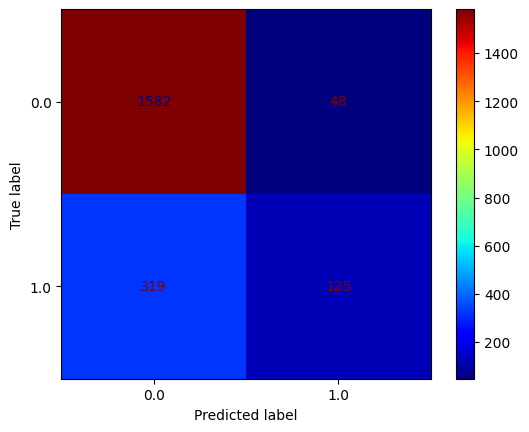

In [89]:
# Visualization using confusion Matrix for Train set
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(logreg, train_tr, y_train, cmap='jet'))

the model has low performance for predicting 1 Label as label 1

Confusion Matrix      : 


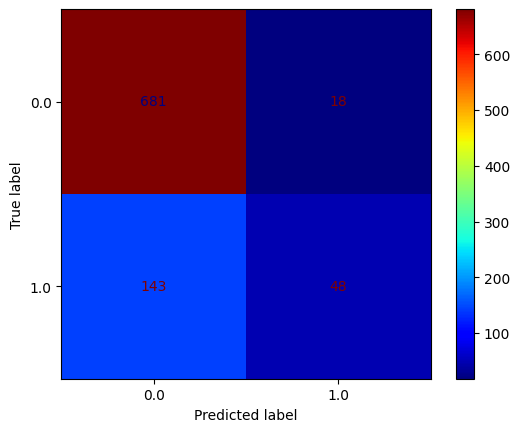

In [90]:
# Visualization using confusion Matrix for Test set
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(logreg, test_tr, y_test, cmap='jet'))

result for test set is similiar with train set, is lower performance to predict label 1

## Decission Tree Classifier

In [91]:
# Decission Tree Classification Model Test
dtc.fit(train_tr, y_train)

dtc_train = dtc.predict(train_tr)
dtc_test = dtc.predict(test_tr)

print(classification_report(y_train, dtc_train))
print(classification_report(y_test, dtc_test))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1630
         1.0       1.00      0.98      0.99       444

    accuracy                           0.99      2074
   macro avg       1.00      0.99      0.99      2074
weighted avg       0.99      0.99      0.99      2074

              precision    recall  f1-score   support

         0.0       0.84      0.85      0.85       699
         1.0       0.43      0.41      0.42       191

    accuracy                           0.76       890
   macro avg       0.63      0.63      0.63       890
weighted avg       0.75      0.76      0.75       890



In [97]:
dtc_reports = {}
dtc_score_reports = {
    'train - precision' : precision_score(y_train, dtc_train),
    'train - recall' : recall_score(y_train, dtc_train),
    'train - accuracy' : accuracy_score(y_train, dtc_train),
    'train - f1_score' : f1_score(y_train, dtc_train),
    'test - precision' : precision_score(y_test, dtc_test),
    'test - recall' : recall_score(y_test, dtc_test),
    'test - accuracy_score' : accuracy_score(y_test, dtc_test),
    'test - f1_score' : f1_score(y_test, dtc_test),
}
dtc_reports['DTC (Default Hyperparameter)'] = dtc_score_reports
dtc_reports = pd.DataFrame(dtc_reports)
dtc_reports

,DTC (Default Hyperparameter)
test - accuracy_score,0.756180
test - f1_score,0.418231
test - precision,0.428571
test - recall,0.408377
train - accuracy,0.994696
train - f1_score,0.987486
train - precision,0.997701
train - recall,0.977477


it shows that dtc have 99% score on the train set, to make sure the data is valid. will be implement cross validation on this model

In [95]:
#define pipeline for DTC
dtc_pipe = Pipeline([
        ('preprocess_1', full_pipeline),
        ('model_1', DecisionTreeClassifier(random_state=0))
    ])

In [96]:
# cross-val Decission Tree Accuracy
scores_accuracy_dtc = cross_val_score(dtc_pipe, X_train, y_train,
                         scoring="accuracy", cv=10)
print(scores_accuracy_dtc )
print(scores_accuracy_dtc.mean())

[0.72115385 0.69711538 0.75480769 0.73076923 0.8115942  0.70531401
 0.71014493 0.71497585 0.79710145 0.74879227]
0.7391768859160164


In [98]:
# cross-val Decission Tree F1 Score
scores_f1_dtc = cross_val_score(dtc_pipe, X_train, y_train,
                         scoring="f1", cv=10)
print(scores_f1_dtc )
print(scores_f1_dtc.mean())

[0.40816327 0.36363636 0.38554217 0.42857143 0.60606061 0.34408602
 0.31818182 0.37894737 0.51162791 0.36585366]
0.4110670605870796


In [99]:
# cross-val Decission Tree Precission
scores_prec_dtc = cross_val_score(dtc_pipe, X_train, y_train,
                         scoring="precision", cv=10)
print(scores_prec_dtc )
print(scores_prec_dtc.mean())

[0.37735849 0.33333333 0.42105263 0.39622642 0.54545455 0.32653061
 0.31818182 0.35294118 0.52380952 0.39473684]
0.39896253888392946


In [100]:
# cross-val Decission Tree Recall
scores_recall_dtc = cross_val_score(dtc_pipe, X_train, y_train,
                         scoring="recall", cv=10)
print(scores_recall_dtc )
print(scores_recall_dtc.mean())

[0.44444444 0.4        0.35555556 0.46666667 0.68181818 0.36363636
 0.31818182 0.40909091 0.5        0.34090909]
0.42803030303030304


In [101]:
dtc_new_reports = {}
dtc_score_reports_new = {
    'train - precision' : scores_prec_dtc.mean(),
    'train - recall' : scores_recall_dtc.mean(),
    'train - accuracy' : scores_accuracy_dtc.mean(),
    'train - f1_score' : scores_f1_dtc.mean(),
    'test - precision' : precision_score(y_test, dtc_test),
    'test - recall' : recall_score(y_test, dtc_test),
    'test - accuracy_score' : accuracy_score(y_test, dtc_test),
    'test - f1_score' : f1_score(y_test, dtc_test),
}
dtc_new_reports['DTC (Default Hyperparameter)'] = dtc_score_reports_new
dtc_new_reports = pd.DataFrame(dtc_new_reports)
dtc_new_reports

,DTC (Default Hyperparameter)
test - accuracy_score,0.756180
test - f1_score,0.418231
test - precision,0.428571
test - recall,0.408377
train - accuracy,0.739177
train - f1_score,0.411067
train - precision,0.398963
train - recall,0.428030


Confusion Matrix      : 


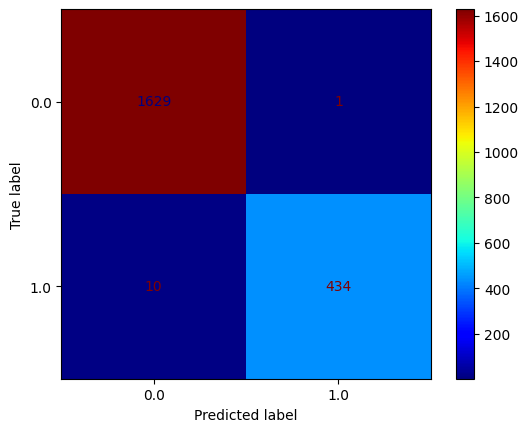

In [92]:
# Visualization using confusion Matrix for Train set
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dtc, train_tr, y_train, cmap='jet'))

it shows high performance for predicting label 1 on train set

Confusion Matrix      : 


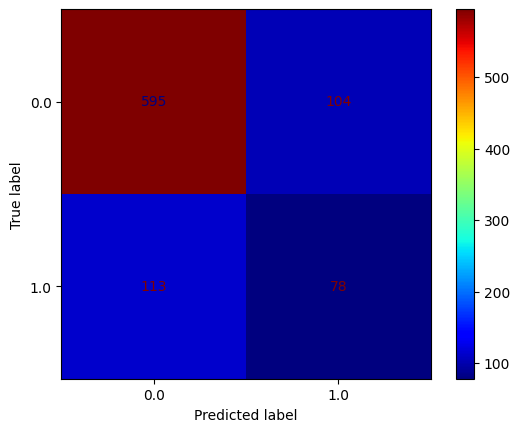

In [102]:
# Visualization using confusion Matrix for Test set
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dtc, test_tr, y_test, cmap='jet'))

on the test set it show lower performance from train set to predict label 1

## Random Forest Classification

In [103]:
# Random Forest Classification Model Test
rfc.fit(train_tr, y_train)

rfc_train = rfc.predict(train_tr)
rfc_test = rfc.predict(test_tr)

print(classification_report(y_train, rfc_train))
print(classification_report(y_test, rfc_test))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1630
         1.0       1.00      0.98      0.99       444

    accuracy                           0.99      2074
   macro avg       1.00      0.99      0.99      2074
weighted avg       0.99      0.99      0.99      2074

              precision    recall  f1-score   support

         0.0       0.85      0.95      0.89       699
         1.0       0.65      0.37      0.47       191

    accuracy                           0.82       890
   macro avg       0.75      0.66      0.68       890
weighted avg       0.80      0.82      0.80       890



In [104]:
rfc_reports = {}
rfc_score_reports = {
    'train - precision' : precision_score(y_train, rfc_train),
    'train - recall' : recall_score(y_train, rfc_train),
    'train - accuracy' : accuracy_score(y_train, rfc_train),
    'train - f1_score' : f1_score(y_train, rfc_train),
    'test - precision' : precision_score(y_test, rfc_test),
    'test - recall' : recall_score(y_test, rfc_test),
    'test - accuracy_score' : accuracy_score(y_test, rfc_test),
    'test - f1_score' : f1_score(y_test, rfc_test),
}
rfc_reports['RFC (Default Hyperparameter)'] = rfc_score_reports
rfc_reports = pd.DataFrame(rfc_reports)
rfc_reports

,RFC (Default Hyperparameter)
test - accuracy_score,0.821348
test - f1_score,0.468227
test - precision,0.648148
test - recall,0.366492
train - accuracy,0.994696
train - f1_score,0.987486
train - precision,0.997701
train - recall,0.977477


it shows that on train set model almost perfectly predict both classification, therefor will continue to implement cross validation

In [105]:
#define pipeline for RFC
rfc_pipe = Pipeline([
        ('preprocess_1', full_pipeline),
        ('model_1', RandomForestClassifier(random_state=0))
    ])

In [106]:
# cross-val Random Forest Classifier Accuracy
scores_accuracy_rfc = cross_val_score(rfc_pipe, X_train, y_train,
                         scoring="accuracy", cv=10)
print(scores_accuracy_rfc)
print(scores_accuracy_rfc.mean())

[0.83653846 0.77884615 0.82211538 0.8125     0.84541063 0.83574879
 0.80676329 0.83574879 0.8647343  0.83574879]
0.8274154589371981


In [107]:
# cross-val Random Forest Classifier F1
scores_f1_rfc = cross_val_score(rfc_pipe, X_train, y_train,
                         scoring="f1", cv=10)
print(scores_f1_rfc)
print(scores_f1_rfc.mean())

[0.51428571 0.39473684 0.49315068 0.45070423 0.6        0.54054054
 0.39393939 0.51428571 0.62162162 0.52777778]
0.5051042514839645


In [108]:
# cross-val Random Forest Classifier Precision
scores_prec_rfc = cross_val_score(rfc_pipe, X_train, y_train,
                         scoring="precision", cv=10)
print(scores_prec_rfc)
print(scores_prec_rfc.mean())

[0.72       0.48387097 0.64285714 0.61538462 0.66666667 0.66666667
 0.59090909 0.69230769 0.76666667 0.67857143]
0.6523900937771906


In [109]:
# cross-val Random Forest Classifier Recall
scores_recall_rfc = cross_val_score(rfc_pipe, X_train, y_train,
                         scoring="recall", cv=10)
print(scores_recall_rfc)
print(scores_recall_rfc.mean())

[0.4        0.33333333 0.4        0.35555556 0.54545455 0.45454545
 0.29545455 0.40909091 0.52272727 0.43181818]
0.41479797979797983


In [110]:
rfc_new_reports = {}
rfc_score_reports_new = {
    'train - precision' : scores_prec_rfc.mean(),
    'train - recall' : scores_recall_rfc.mean(),
    'train - accuracy' : scores_accuracy_rfc.mean(),
    'train - f1_score' : scores_f1_rfc.mean(),
    'test - precision' : precision_score(y_test, rfc_test),
    'test - recall' : recall_score(y_test, rfc_test),
    'test - accuracy_score' : accuracy_score(y_test, rfc_test),
    'test - f1_score' : f1_score(y_test, rfc_test),
}
rfc_new_reports['RFC (Default Hyperparameter)'] = rfc_score_reports_new
rfc_new_reports = pd.DataFrame(rfc_new_reports)
rfc_new_reports

,RFC (Default Hyperparameter)
test - accuracy_score,0.821348
test - f1_score,0.468227
test - precision,0.648148
test - recall,0.366492
train - accuracy,0.827415
train - f1_score,0.505104
train - precision,0.652390
train - recall,0.414798


Confusion Matrix      : 


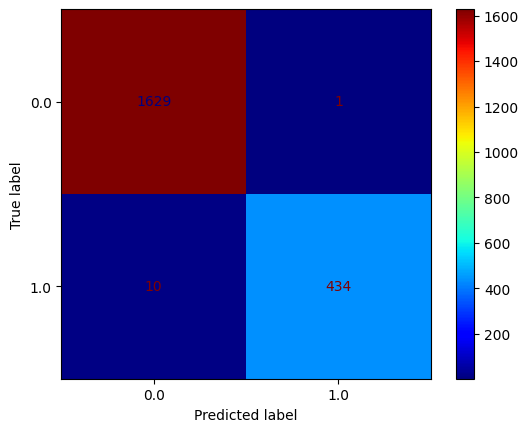

In [111]:
# Visualization using confusion Matrix for Train set
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rfc, train_tr, y_train, cmap='jet'))

it shows that RFC have good performance to predict both label

Confusion Matrix      : 


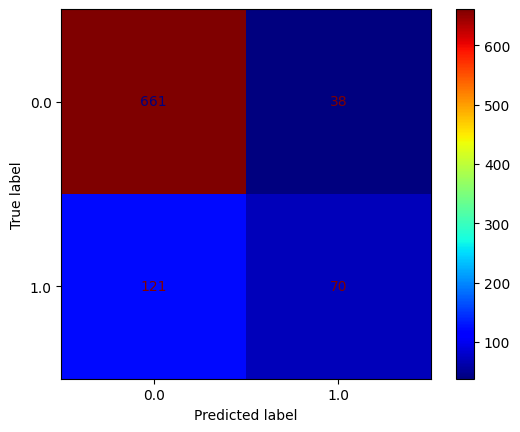

In [161]:
# Visualization using confusion Matrix for Train set
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rfc, test_tr, y_test, cmap='jet'))

but on the test set show low perfomance to predict label 1

## Support Vector Classification

In [113]:
# Support Vector Classification Model Test
svc.fit(train_tr, y_train)

svc_train = svc.predict(train_tr)
svc_test = svc.predict(test_tr)

print(classification_report(y_train, svc_train))
print(classification_report(y_test, svc_test))

              precision    recall  f1-score   support

         0.0       0.86      0.96      0.90      1630
         1.0       0.73      0.40      0.52       444

    accuracy                           0.84      2074
   macro avg       0.79      0.68      0.71      2074
weighted avg       0.83      0.84      0.82      2074

              precision    recall  f1-score   support

         0.0       0.84      0.96      0.90       699
         1.0       0.70      0.33      0.45       191

    accuracy                           0.83       890
   macro avg       0.77      0.65      0.67       890
weighted avg       0.81      0.83      0.80       890



In [114]:
svc_reports = {}
svc_score_reports = {
    'train - precision' : precision_score(y_train, svc_train),
    'train - recall' : recall_score(y_train, svc_train),
    'train - accuracy' : accuracy_score(y_train, svc_train),
    'train - f1_score' : f1_score(y_train, svc_train),
    'test - precision' : precision_score(y_test, svc_test),
    'test - recall' : recall_score(y_test, svc_test),
    'test - accuracy_score' : accuracy_score(y_test, svc_test),
    'test - f1_score' : f1_score(y_test, svc_test),
}
svc_reports['SVC (Default Hyperparameter)'] = svc_score_reports
svc_reports = pd.DataFrame(svc_reports)
svc_reports

,SVC (Default Hyperparameter)
test - accuracy_score,0.825843
test - f1_score,0.448399
test - precision,0.700000
test - recall,0.329843
train - accuracy,0.840887
train - f1_score,0.520349
train - precision,0.733607
train - recall,0.403153


Confusion Matrix      : 


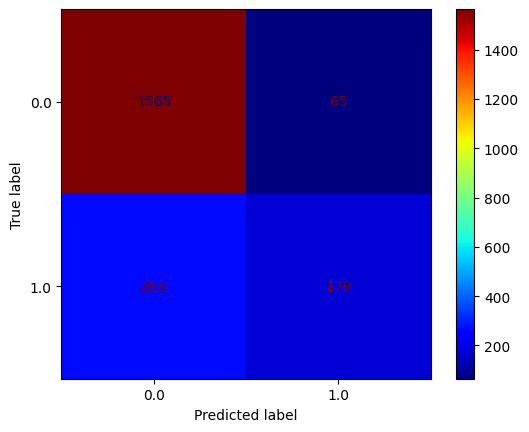

In [115]:
# Visualization using confusion Matrix for Train set
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svc, train_tr, y_train, cmap='jet'))

result model SVC has poor performance on predict label 1 as label 1

## K - Nearest Neighbourgh

In [116]:
# K - Nearest Neighbourgh Model Test
knn.fit(train_tr, y_train)

knn_train = knn.predict(train_tr)
knn_test = knn.predict(test_tr)

print(classification_report(y_train, knn_train))
print(classification_report(y_test, knn_test))

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91      1630
         1.0       0.75      0.48      0.58       444

    accuracy                           0.85      2074
   macro avg       0.81      0.72      0.75      2074
weighted avg       0.84      0.85      0.84      2074

              precision    recall  f1-score   support

         0.0       0.85      0.92      0.88       699
         1.0       0.57      0.38      0.46       191

    accuracy                           0.81       890
   macro avg       0.71      0.65      0.67       890
weighted avg       0.79      0.81      0.79       890



In [117]:
knn_reports = {}
knn_score_reports = {
    'train - precision' : precision_score(y_train, knn_train),
    'train - recall' : recall_score(y_train, knn_train),
    'train - accuracy' : accuracy_score(y_train, knn_train),
    'train - f1_score' : f1_score(y_train, knn_train),
    'test - precision' : precision_score(y_test, knn_test),
    'test - recall' : recall_score(y_test, knn_test),
    'test - accuracy_score' : accuracy_score(y_test, knn_test),
    'test - f1_score' : f1_score(y_test, knn_test),
}
knn_reports['KNN (Default Hyperparameter)'] = knn_score_reports
knn_reports = pd.DataFrame(knn_reports)
knn_reports

,KNN (Default Hyperparameter)
test - accuracy_score,0.805618
test - f1_score,0.457680
test - precision,0.570312
test - recall,0.382199
train - accuracy,0.853905
train - f1_score,0.583219
train - precision,0.749117
train - recall,0.477477


Confusion Matrix      : 


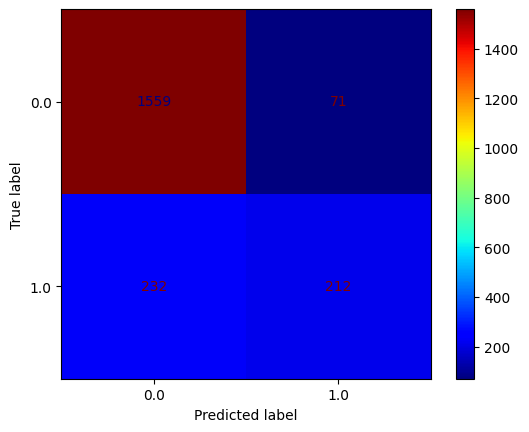

In [118]:
# Visualization using confusion Matrix for Train set
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn, train_tr, y_train, cmap='jet'))

KNN model has poor performance for predicting label 1 as label 1

Confusion Matrix      : 


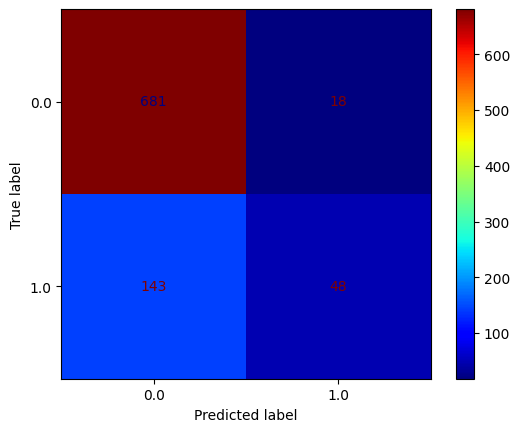

In [119]:
# Visualization using confusion Matrix for Test set
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(logreg, test_tr, y_test, cmap='jet'))

both train and test set, the model has poor performance to predict label 1

## Naive Bayes

In [120]:
# Naive Bayes Model Test
nb.fit(train_tr, y_train)

nb_train = nb.predict(train_tr)
nb_test = nb.predict(test_tr)

print(classification_report(y_train, nb_train))
print(classification_report(y_test, nb_test))

              precision    recall  f1-score   support

         0.0       0.87      0.86      0.87      1630
         1.0       0.51      0.52      0.52       444

    accuracy                           0.79      2074
   macro avg       0.69      0.69      0.69      2074
weighted avg       0.79      0.79      0.79      2074

              precision    recall  f1-score   support

         0.0       0.87      0.88      0.87       699
         1.0       0.54      0.51      0.52       191

    accuracy                           0.80       890
   macro avg       0.70      0.69      0.70       890
weighted avg       0.80      0.80      0.80       890



In [121]:
nb_reports = {}
nb_score_reports = {
    'train - precision' : precision_score(y_train, nb_train),
    'train - recall' : recall_score(y_train, nb_train),
    'train - accuracy' : accuracy_score(y_train, nb_train),
    'train - f1_score' : f1_score(y_train, nb_train),
    'test - precision' : precision_score(y_test, nb_test),
    'test - recall' : recall_score(y_test, nb_test),
    'test - accuracy_score' : accuracy_score(y_test, nb_test),
    'test - f1_score' : f1_score(y_test, nb_test),
}
nb_reports['NB (Default Hyperparameter)'] = nb_score_reports
nb_reports = pd.DataFrame(nb_reports)
nb_reports

,NB (Default Hyperparameter)
test - accuracy_score,0.800000
test - f1_score,0.521505
test - precision,0.535912
test - recall,0.507853
train - accuracy,0.790743
train - f1_score,0.515625
train - precision,0.511062
train - recall,0.520270


Confusion Matrix      : 


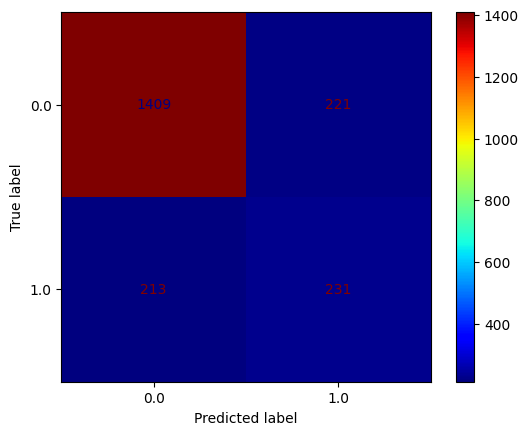

In [122]:
# Visualization using confusion Matrix for Train set
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(nb, train_tr, y_train, cmap='jet'))

the model has poor performance for predicting label 1

Confusion Matrix      : 


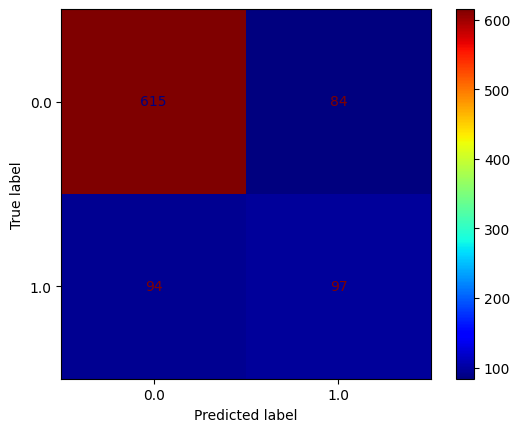

In [123]:
# Visualization using confusion Matrix for Test set
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(nb, test_tr, y_test, cmap='jet'))

both train set and and test set has poor perfomance on this model

### Model Test Summary

In [137]:
model_summary = pd.concat([logreg_reports,dtc_new_reports['DTC (Default Hyperparameter)'],rfc_new_reports['RFC (Default Hyperparameter)'],
                           svc_reports['SVC (Default Hyperparameter)'],knn_reports['KNN (Default Hyperparameter)'],nb_reports['NB (Default Hyperparameter)'] ], axis=1)
model_summary= model_summary.T
model_summary


,test - accuracy_score,test - f1_score,test - precision,test - recall,train - accuracy,train - f1_score,train - precision,train - recall
Logreg (Default Hyperparameter),0.819101,0.373541,0.727273,0.251309,0.823047,0.405186,0.722543,0.281532
DTC (Default Hyperparameter),0.756180,0.418231,0.428571,0.408377,0.739177,0.411067,0.398963,0.428030
RFC (Default Hyperparameter),0.821348,0.468227,0.648148,0.366492,0.827415,0.505104,0.652390,0.414798
SVC (Default Hyperparameter),0.825843,0.448399,0.700000,0.329843,0.840887,0.520349,0.733607,0.403153
KNN (Default Hyperparameter),0.805618,0.457680,0.570312,0.382199,0.853905,0.583219,0.749117,0.477477
NB (Default Hyperparameter),0.800000,0.521505,0.535912,0.507853,0.790743,0.515625,0.511062,0.520270


Ranking the models based on their performance across various metrics, the top three models are as follows:

- Support Vector Classifier (SVC): SVC achieves the highest test accuracy among all models, indicating better overall prediction performance. It also shows reasonably balanced performance across other metrics such as F1-Score, Precision, and Recall.

- Random Forest Classifier (RFC): RFC comes in second place, with slightly lower test accuracy than SVC but higher F1-Score, Precision, and Recall. It offers a good balance between accuracy and capturing the complexities of the data.

- Naive Bayes (NB): NB is ranked third, demonstrating a strong performance in terms of test F1-Score, Precision, and Recall. Although it has a slightly lower test accuracy compared to SVC and RFC, NB performs well in capturing true positives and has a higher F1-Score.

In [141]:
model_summary['test - f1_score'].sort_values(ascending=False).head(3)

NB (Default Hyperparameter)     0.521505
RFC (Default Hyperparameter)    0.468227
KNN (Default Hyperparameter)    0.457680
Name: test - f1_score, dtype: float64

By consideration since in all model tells that class is imbalance and from the business perpective we preventing that False Negative and False Positive occured, we choose f1-score for cross validating data to look overall data for FP and FN

In [155]:
#define pipeline for NB
nb_pipe = Pipeline([
        ('preprocess_1', full_pipeline),
        ('model_1', GaussianNB())
    ])
# cross-val Naive Bayes
scores_f1_nb = cross_val_score(nb_pipe, X_train, y_train,
                         scoring="f1", cv=10)
print(scores_f1_nb)
print(scores_f1_nb.mean())

[0.60215054 0.45833333 0.53932584 0.56470588 0.48888889 0.46315789
 0.45       0.42222222 0.56179775 0.57471264]
0.5125294998352417




```
The mean f1 score across all the folds is approximately 0.5125, indicating that, on average,
the model correctly predicts the target variable with an f1 score of around 51.25%.
```



In [157]:
#define pipeline for RFC
rfc_pipe = Pipeline([
        ('preprocess_1', full_pipeline),
        ('model_1', RandomForestClassifier(random_state=0))
    ])
# cross-val Naive Bayes
scores_f1_rfc = cross_val_score(rfc_pipe, X_train, y_train,
                         scoring="f1", cv=10)
print(scores_f1_rfc)
print(scores_f1_rfc.mean())

[0.51428571 0.39473684 0.49315068 0.45070423 0.6        0.54054054
 0.39393939 0.51428571 0.62162162 0.52777778]
0.5051042514839645




```
The mean f1 score across all the folds is approximately 0.5051, indicating that, on average,
the model correctly predicts the target variable with an f1 score of around 50.51%.
```



In [171]:
#define pipeline for SVC
svc_pipe = Pipeline([
        ('preprocess_1', full_pipeline),
        ('model_1', SVC(random_state=0))
    ])
# cross-val Support Vector Machine roc_auc
scores_f1_svc = cross_val_score(svc_pipe, X_train, y_train,
                         scoring="f1", cv=10)
print(scores_f1_svc)
print(scores_f1_svc.mean())

[0.56756757 0.45070423 0.48571429 0.4        0.54054054 0.47761194
 0.38095238 0.47761194 0.5915493  0.53968254]
0.491193471618109




```
The mean f1 score across all the folds is approximately 0.4911, indicating that, on average,
the model correctly predicts the target variable with an f1 score of around 49.11%.
```



In [184]:
model_test_crossVal = {
                  'Model': ['Random Forest',  'Support Vector Machine', 'Naive Bayes'],
                  'CrossVal f1 score': [0.5051,0.4911,0.525]

}
model_test_crossVal = pd.DataFrame(model_test_crossVal)
model_test_crossVal.sort_values(by='CrossVal f1 score',ascending=False)

,Model,CrossVal f1 score
2,Naive Bayes,0.5250
0,Random Forest,0.5051
1,Support Vector Machine,0.4911


- as per result NB is the highest overall mean score, but if between fetures have high correlation, NB result will not relevan

- RFC is more highest overall on all aspect

### HYPER PARAMETER TUNING

In [170]:
# pipeline preprocess + model
rfc_pipe = Pipeline([
        ('preprocess', full_pipeline),
        ('model', RandomForestClassifier(random_state=0))
    ])

# hyperparameter tuning combination RFC
params_rfc = [
    {'model__n_estimators': [50, 70, 90],
     'model__max_features': [2, 3],
     'model__max_depth': [3, 5, 7, 9, 12, None],
     'model__criterion': ['gini', 'entropy']},
  ]

grid_search_rfc = GridSearchCV(rfc_pipe, params_rfc, cv=10,
                           scoring='f1',
                           return_train_score=True)

rfc_tuning = grid_search_rfc.fit(X_train, y_train)
rfc_tuning

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num_1',
                                                                         Pipeline(steps=[('outlier_1',
                                                                                          Winsorizer(capping_method='iqr',
                                                                                                     fold=1.5,
                                                                                                     tail='both')),
                                                                                         ('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scalar',
                                                                                          MinMaxScaler())]),
                                                                         ['pay_0',
                                                                          'pay_2',
                                                                          'pay_3',
                                                                          'pay_4',
                                                                          'pay_05',
                                                                          'pay_06',
                                                                          'limit_balance']),
                                                                        ('num_2',
                                                                         Pipeline(steps=...
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scalar',
                                                                                          MinMaxScaler())]),
                                                                         ['pay_amt_2',
                                                                          'pay_amt_3',
                                                                          'pay_amt_1',
                                                                          'pay_amt_4'])])),
                                       ('model',
                                        RandomForestClassifier(random_state=0))]),
             param_grid=[{'model__criterion': ['gini', 'entropy'],
                          'model__max_depth': [3, 5, 7, 9, 12, None],
                          'model__max_features': [2, 3],
                          'model__n_estimators': [50, 70, 90]}],
             return_train_score=True, scoring='f1')

In [172]:
print(rfc_tuning.best_params_)

{'model__criterion': 'entropy', 'model__max_depth': 9, 'model__max_features': 2, 'model__n_estimators': 70}


In [173]:
best_model_rfc = RandomForestClassifier(criterion='entropy', max_depth=3, max_features=3, n_estimators=50, random_state=0)
best_model_rfc.fit(train_tr, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, max_features=3,
                       n_estimators=50, random_state=0)

In [174]:
y_pred_rfc = best_model_rfc.predict(test_tr)
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
precision_rfc = precision_score(y_test, y_pred_rfc)
recall_rfc = recall_score(y_test, y_pred_rfc)
f1_rfc = f1_score(y_test, y_pred_rfc)

In [175]:
tuning_rfc_reports = {}
rfc_tuning_score_reports = {
    'test_tuning - precision' : precision_rfc,
    'test_tuning - recall' : recall_rfc,
    'test_tuning - accuracy' : accuracy_rfc,
    'test_tuning - f1_score' : f1_rfc,
    'test - precision' : precision_score(y_test, rfc_test),
    'test - recall' : recall_score(y_test, rfc_test),
    'test - accuracy_score' : accuracy_score(y_test, rfc_test),
    'test - f1_score' : f1_score(y_test, rfc_test),
}
tuning_rfc_reports['RFC (Default Hyperparameter)'] = rfc_tuning_score_reports
tuning_rfc_reports = pd.DataFrame(tuning_rfc_reports)
tuning_rfc_reports

,RFC (Default Hyperparameter)
test - accuracy_score,0.821348
test - f1_score,0.468227
test - precision,0.648148
test - recall,0.366492
test_tuning - accuracy,0.825843
test_tuning - f1_score,0.410646
test_tuning - precision,0.750000
test_tuning - recall,0.282723


In [185]:
# Train with Random Search
%%time

rfc_randomcv = RandomizedSearchCV(rfc_pipe,
                                 params_rfc,
                                 n_iter=50,
                                 cv=10,
                                 random_state=0,
                                 n_jobs=-1,
                                 scoring='f1')
randomCV_rfc = rfc_randomcv.fit(X_train, y_train)
randomCV_rfc

CPU times: user 3.71 s, sys: 344 ms, total: 4.06 s
Wall time: 2min 12s


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('num_1',
                                                                               Pipeline(steps=[('outlier_1',
                                                                                                Winsorizer(capping_method='iqr',
                                                                                                           fold=1.5,
                                                                                                           tail='both')),
                                                                                               ('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scalar',
                                                                                                MinMaxScaler())]),
                                                                               ['pay_0',
                                                                                'pay_2',
                                                                                'pay_3',
                                                                                'pay_4',
                                                                                'pay_05',
                                                                                'pay_06',
                                                                                'limit_balance']),
                                                                              ('num_2',
                                                                               Pipeline(...
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scalar',
                                                                                                MinMaxScaler())]),
                                                                               ['pay_amt_2',
                                                                                'pay_amt_3',
                                                                                'pay_amt_1',
                                                                                'pay_amt_4'])])),
                                             ('model',
                                              RandomForestClassifier(random_state=0))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions=[{'model__criterion': ['gini',
                                                              'entropy'],
                                         'model__max_depth': [3, 5, 7, 9, 12,
                                                              None],
                                         'model__max_features': [2, 3],
                                         'model__n_estimators': [50, 70, 90]}],
                   random_state=0, scoring='f1')

In [195]:
print(randomCV_rfc.best_params_)

{'model__n_estimators': 70, 'model__max_features': 2, 'model__max_depth': 9, 'model__criterion': 'entropy'}


In [196]:
rand_best_model_rfc = RandomForestClassifier(criterion='entropy', max_depth=9, max_features=2, n_estimators=70, random_state=0)
rand_best_model_rfc.fit(train_tr, y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, max_features=2,
                       n_estimators=70, random_state=0)

In [197]:
y_pred_rfc_rand = rand_best_model_rfc.predict(test_tr)
accuracy_rfc_rand = accuracy_score(y_test, y_pred_rfc_rand)
precision_rfc_rand = precision_score(y_test, y_pred_rfc_rand)
recall_rfc_rand = recall_score(y_test, y_pred_rfc_rand)
f1_rfc_rand = f1_score(y_test, y_pred_rfc_rand)

In [198]:
tuning_rfc_reports_rand = {}
rfc_tuning_score_reports_rand = {
    'test_tuning - precision' : precision_rfc,
    'test_tuning - recall' : recall_rfc,
    'test_tuning - accuracy' : accuracy_rfc,
    'test_tuning - f1_score' : f1_rfc,
    'test_rand - precision' : precision_rfc_rand,
    'test_rand - recall' : recall_rfc_rand,
    'test_rand - accuracy' : accuracy_rfc_rand,
    'test_ran - f1_score' : f1_rfc_rand,
    'test - precision' : precision_score(y_test, rfc_test),
    'test - recall' : recall_score(y_test, rfc_test),
    'test - accuracy_score' : accuracy_score(y_test, rfc_test),
    'test - f1_score' : f1_score(y_test, rfc_test),
}
tuning_rfc_reports_rand['RFC (Default Hyperparameter)'] = rfc_tuning_score_reports_rand
tuning_rfc_reports_rand = pd.DataFrame(tuning_rfc_reports_rand)
tuning_rfc_reports_rand

,RFC (Default Hyperparameter)
test - accuracy_score,0.821348
test - f1_score,0.468227
test - precision,0.648148
test - recall,0.366492
test_ran - f1_score,0.469751
test_rand - accuracy,0.832584
test_rand - precision,0.733333
test_rand - recall,0.345550
test_tuning - accuracy,0.825843
test_tuning - f1_score,0.410646


In [191]:
#define pipeline for RFC after Hyper parameter Randomsearch CV
rfc_pipe_rand = Pipeline([
        ('preprocess_1', full_pipeline),
        ('model_1', RandomForestClassifier(criterion='entropy', max_depth=9, max_features=2, n_estimators=70,
                                              random_state=0))
    ])
# cross-val Random Forest Classifier Accuracy
scores_accuracy_rfc_rand = cross_val_score(rfc_pipe, X_train, y_train,
                         scoring="accuracy", cv=10)
print(scores_accuracy_rfc_rand)
print(scores_accuracy_rfc_rand.mean())

[0.83653846 0.77884615 0.82211538 0.8125     0.84541063 0.83574879
 0.80676329 0.83574879 0.8647343  0.83574879]
0.8274154589371981


# MODEL EVALUATION

In [110]:
model_summary

,Logreg (Default Hyperparameter),DTC (Default Hyperparameter),RFC (Default Hyperparameter),SVC (Default Hyperparameter),KNN (Default Hyperparameter),NB (Default Hyperparameter)
test - accuracy_score,0.819101,0.756180,0.821348,0.825843,0.805618,0.800000
test - f1_score,0.373541,0.418231,0.468227,0.448399,0.457680,0.521505
test - precision,0.727273,0.428571,0.648148,0.700000,0.570312,0.535912
test - recall,0.251309,0.408377,0.366492,0.329843,0.382199,0.507853
train - accuracy,0.823047,0.739177,0.827415,0.840887,0.853905,0.790743
train - f1_score,0.405186,0.411067,0.505104,0.520349,0.583219,0.515625
train - precision,0.722543,0.398963,0.652390,0.733607,0.749117,0.511062
train - recall,0.281532,0.428030,0.414798,0.403153,0.477477,0.520270


- Random Forest Classifier (RFC): RFC comes in second place, with slightly lower test accuracy than SVC but higher F1-Score, Precision, and Recall. It offers a good balance between accuracy and capturing the complexities of the data.

In [199]:
model_test_crossVal.sort_values(by='CrossVal f1 score',ascending=False)

,Model,CrossVal f1 score
2,Naive Bayes,0.5250
0,Random Forest,0.5051
1,Support Vector Machine,0.4911


- Naive Bayes Achive Highest Overal Mean Score using f1 score following by RFC, but Naive Bayes has extreme wrong predict on label 1 so consider RFC will be reasonable

In [200]:
tuning_rfc_reports_rand

,RFC (Default Hyperparameter)
test - accuracy_score,0.821348
test - f1_score,0.468227
test - precision,0.648148
test - recall,0.366492
test_ran - f1_score,0.469751
test_rand - accuracy,0.832584
test_rand - precision,0.733333
test_rand - recall,0.345550
test_tuning - accuracy,0.825843
test_tuning - f1_score,0.410646


Comparing the three scenarios, we can draw the following conclusions:

- The RFC model with default hyperparameters (test_) has a relatively high accuracy score of 0.821348, but the f1_score (0.468227) indicates that there is room for improvement in terms of balancing precision and recall.

- The Random Search (test_rand) achieved slightly better performance than the default hyperparameters in terms of f1_score (0.454212) and accuracy (0.832584). The precision (0.756098) is also higher than the default, but the recall (0.324607) is still relatively low.

- The Grid Search (test_tuning) shows a slightly improved accuracy (0.825843) compared to the default hyperparameters. However, the f1_score (0.410646), precision (0.750000), and recall (0.282723) indicate that further optimization might be necessary.

- Cross validation for method scoring for roc_auc 83%

## MODEL CONCLUSION

- RFC Model achieve the highest overal score, and after Hyperparameter tuning the best paramater after using RandomSearch CV is:
{'model__n_estimators': 70, 'model__max_features': 2, 'model__max_depth': 7, 'model__criterion': 'entropy'}


## MODEL SELECTION

Random Forest Classifier :
- Parameter :
```
{'model__n_estimators': 70,
'model__max_features': 2,
'model__max_depth': 7,
'model__criterion': 'entropy'}
```



# **MODEL SAVING**

In [201]:
# Preparation save model
all_process = Pipeline([
    ("preprocess", full_pipeline),
    ("classification", RandomForestClassifier(criterion='entropy', max_depth=7, max_features=2, n_estimators=70,
                                              random_state=0))
])

all_process.fit(X_train, y_train)
result = all_process.predict(X_test)

print(classification_report(y_test, result))

              precision    recall  f1-score   support

         0.0       0.84      0.96      0.90       699
         1.0       0.72      0.34      0.46       191

    accuracy                           0.83       890
   macro avg       0.78      0.65      0.68       890
weighted avg       0.82      0.83      0.81       890



In [202]:
# save model
import pickle

pickle.dump(all_process, open('all_process.pkl', 'wb'))

with open('iqr_columns_1_cleaned.txt', 'w') as file_1:
  file_1.write(str(iqr_columns_1_cleaned))

with open('iqr_columns_2_cleaned.txt', 'w') as file_2:
  file_2.write(str(iqr_columns_2_cleaned))

# **MODEL INFERENCE**

### MODEL LOAD

In [203]:
# Step 1 - Import dependecies
model = pickle.load(open('all_process.pkl', 'rb'))

with open('iqr_columns_1_cleaned.txt', 'r') as file_1:
  iqr_columns_1_cleaned = file_1.read()

with open('iqr_columns_2_cleaned.txt', 'r') as file_2:
  iqr_columns_2_cleaned = file_2.read()



```
New BigQuery Data :
SELECT limit_balance,
      CAST(sex AS INT64) AS sex,
      CAST(education_level AS INT64) AS education_level,
      CAST(marital_status AS INT64) AS marital_status,
      age,
      pay_0, pay_2, pay_3, pay_4,
      CAST(pay_5 AS FLOAT64) AS pay_05,
      CAST(pay_6 AS FLOAT64) AS pay_06,
      bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6,
      pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6,
      CAST(default_payment_next_month AS INT64) AS default_payment_next_month
FROM `bigquery-public-data.ml_datasets.credit_card_default`
ORDER BY RAND()
LIMIT 10
```



In [204]:
# Step 2 - Input New Data
new_df = pd.read_csv('/content/new_dataset.csv')
new_df

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_05,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,290000,2,3,2,32,0,0,0,0,0,...,26671,24826,22287,3000,3000,3000,3000,3000,3000,0
1,80000,1,1,1,41,3,2,2,2,2,...,9155,8864,9215,1200,0,800,0,500,900,1
2,50000,2,1,2,25,0,0,0,0,0,...,40345,31003,29693,1870,2500,3017,1060,1300,2000,0
3,160000,1,2,2,32,0,0,0,0,0,...,18478,3541,6459,1907,2000,2000,300,6459,3000,0
4,450000,2,2,1,38,-2,-2,-2,-2,-2,...,390,390,390,390,780,390,390,390,390,1
5,50000,1,2,1,38,0,0,0,0,0,...,20683,19283,19965,1700,1650,850,700,1000,1000,0
6,300000,2,1,2,28,0,0,0,-1,-1,...,6975,9356,3697,1818,7217,7023,9383,3714,6546,0
7,20000,2,1,2,25,1,2,0,0,0,...,17000,17000,20000,2,2000,3000,0,3000,0,0
8,50000,1,1,2,26,-1,0,0,0,0,...,19588,20024,18694,1629,1272,656,706,954,700,0
9,100000,1,3,2,32,0,0,0,0,-1,...,10726,1121,61067,2460,2220,1400,1121,61067,2210,0


In [205]:
# Step 3 - Chiqr_columns_1_cleaned
iqr_columns_1_cleaned

"['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_05', 'pay_06', 'limit_balance']"

In [206]:
iqr_columns_2_cleaned

"['pay_amt_2', 'pay_amt_3', 'pay_amt_1', 'pay_amt_4']"

In [207]:
# preprocess and predict
result = model.predict(new_df)
result

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [208]:
# Compare results
y_new = new_df.default_payment_next_month
compare_test = {
                  'y_new_value': y_new,
                  'y_new_pred': result,
}
compare_test = pd.DataFrame(compare_test)
result_test = []
for index,values in compare_test.iterrows():
  if values['y_new_value'] == values['y_new_pred']:
    result_test.append('Match/predicted')
  else:
    result_test.append('Unmatch/predicted_failed')
compare_test['result_test'] = result_test
compare_test


,y_new_value,y_new_pred,result_test
0,0,0.0,Match/predicted
1,1,1.0,Match/predicted
2,0,0.0,Match/predicted
3,0,0.0,Match/predicted
4,1,0.0,Unmatch/predicted_failed
5,0,0.0,Match/predicted
6,0,0.0,Match/predicted
7,0,0.0,Match/predicted
8,0,0.0,Match/predicted
9,0,0.0,Match/predicted




```
From total 10 new data, 9 data has been success to predict

Final score for the model is 90%
```



# **CONCLUSION**

## **1. EDA Analysis** :

- Credit default mostly happen in age 25 until 36
- Default credit is more significantly happen in gender Female
- Education level University mostly appear as credit_default user, 2nd is Graduated School

## **2. Feature Scaling** :
- Chi Square


## **3. Feature not included for modeling** :    
`sex`, `education_level`, `marital_status`, `age`, `bill_amt_1`, `bill_amt_2`, `bill_amt_3`, `bill_amt_4`, `bill_amt_5`, `bill_amt_6`, `pay_amt_5` and `pay_amt_6`


## **4. Feature selected for modeling** :
`pay_0`, `pay_2`, `pay_3`, `pay_4`, `pay_05`, `pay_06`, `limit_balance`, `pay_amt_2`, `pay_amt_3`, `pay_amt_1` and `pay_amt_4`



## **5. Model Train** :
- LogisticRegression
- SVC
- DecisionTreeClassifier
- RandomForestClassifier
- KNeighborsClassifier
- GaussianNB (Naive Bayes)

## **6. Model selected** :
- Random Forest Classification
- Parameter :
{'model__n_estimators': 90,
'model__max_features': 3,
'model__max_depth': 3,
'model__criterion': 'entropy'}
- Model	Accuracy 83%
- Model Precission 75%
- Model F1 Score 45%
- Model Recall Score 32%
- Cross validation roc_auc mean (10 sample) 83%

## **7. Model Test New Dataset Result**
- score 90% from 9/10 new dataset

# **FINAL CONCLUSION**
Random Forest Classification model showed promising results for credit default prediction. It demonstrated high accuracy and F1-scores on both the test dataset and new datasets. The selected features, after excluding certain variables, provided meaningful insights for modeling credit default risk.

